# 🏬 **TASACIÓN DE INMUEBLES** 🏢

Avanzando con el contenido detallado, en este Colab se visualizará la preparación de los datos, posterior análisis, aplicación de modelos y se realizarán conclusiones.

### **2. PREPARACIÓN DE LOS DATOS** 🔖

#### ***2.1 Librerías utilizadas***

A continuación, se detallarán las librerías utilizadas en la manejo de la database y cálculos de predicción.

In [ ]:
# import plotly
# print(plotly.__version__)

In [ ]:
#-------- LIBRERÍAS --------#

# -> Librerías de uso básico
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -> Librerías Complementarias
import sys
import csv
import chardet
from pathlib import Path

#!pip install plotly==5.3.1
import plotly.express as px                 # Librería que permite realizar visualizaciones interactivas
                                            # Algunas funciones usadas se encuentran en versiones más actuales: desde la  4.12.0
                                            # Si tiene una versión anterior, instalar: !pip install plotly==5.3.1



#-------- MÓDULOS DE ANÁLISIS PARA PREDICCIÓN --------#

# -> Regresion Simple
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# -> Regresion lineal multiple
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -> K Neighbors
from sklearn.neighbors import KNeighborsRegressor

# -> Arboles de Decision
from sklearn import ensemble
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -> Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# -> Redes Neuronales
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error
from pandas.api.types import is_numeric_dtype
from sklearn.neural_network import MLPRegressor



#-------- LIBRERÍA AUXILIAR PARA ANÁLISIS ESTADÍSTICO --------#
import statsmodels.api as sm                # modelos estadísticos
import statsmodels.stats.api as sms         # módulo stats de statsmodels
%matplotlib inline
plt.style.use("seaborn-white")

<ipython-input-2-a49d8a492e94>:64: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


#### ***2.2 Dirección de la database***

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1A-4oAsQCneD4HDJRTQgO0WTRQtW0JRnw/edit?usp=sharing&ouid=109033079849202436389&rtpof=true&sd=true"
file_id=url.split('/')[-2]
path='https://drive.google.com/uc?id=' + file_id

#### ***2.3 Carga y visualización preliminar***

Se lleva a cabo el almacenaje de nuestra database en la variable **df**, y posteriormente se realiza una visualización aleatoria.

In [ ]:
df = pd.read_excel(path)

# Visualización aleatoria
df.sample(3)

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,terminos_relevantes,Type,desc_relevante,Suite,Pileta,Patio,Oportunidad,Reciclar,Country,Exc_ubi
2700,47821618,320.0,Casa en Venta en Claros del Bosque Etapa I Fre...,Casa en Venta en Barrio Cerrado Claros del Bos...,"Claros del Bosque Etapa I Lote Central, Claros...",Claros del Bosque,360,300,3,3,...,Casa Venta Claros Bosque Etapa Frente Plaza Pr...,Casa,casa venta barrio cerrado claros bosque cubier...,True,False,False,False,False,False,False
2728,48675258,175.0,Vendo Duplex 3 Dorm en Chacras del Norte,VENDO DUPLEX 3 DORM EN CHACRAS DEL NORTE *Este...,"Spilimbergo s/n, X5009 LFG, Chacra del Norte, ...",Chacra del Norte,180,180,3,3,...,Vendo Duplex Dorm Chacras Norte,Duplex,vendo duplex dorm chacras norte hermoso dúplex...,True,False,False,False,False,False,False
3875,49051560,190.0,Impecable Casa en Venta en Urca - 4 Dor - Pile...,O.C PROPIEDADES les ofrece una excelente oport...,"Nazaret al 3700, URCA, Córdoba",URCA,312,200,4,3,...,Impecable Casa Venta Urca Dor Pileta Escritura,Casa,propiedades ofrece excelente oportunidadimpeca...,True,False,False,False,False,False,True


#### ***2.4 Limpieza de Features***

Para llevar acabo el análisis completo de la Database, es necesario realizar una curaduría de los datos permitiendo identificar features relevantes para realizar los cálculos pertinentes.

##### 2.4.1 *Eliminación de features*

Al observar la Database es posible identificar que columnas como:


*   *Description*,
*   *direccion*,
*   *barrio*,
*   *desc_relevante*.

No cuentan con información relevante en el análisis , por lo tanto serán suprimidas.


In [ ]:
# Drop de Features
df1 = df.drop(columns=['Description','direccion','barrio', 'desc_relevante'])

# Visualización de comprobación
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idPost               7022 non-null   int64  
 1   Precio               7022 non-null   float64
 2   title                7022 non-null   object 
 3   m2total              7022 non-null   int64  
 4   m2cubierto           7022 non-null   int64  
 5   Banos                7022 non-null   int64  
 6   Dormitorios          7022 non-null   int64  
 7   Antiguedad           7022 non-null   int64  
 8   Estrenar             7022 non-null   int64  
 9   Cochera              7022 non-null   int64  
 10  Estado               7022 non-null   int64  
 11  Luminoso             7022 non-null   int64  
 12  coordenadas.lat      6964 non-null   float64
 13  coordenadas.lng      6964 non-null   float64
 14  terminos_relevantes  7022 non-null   object 
 15  Type                 7022 non-null   o

##### 2.4.2 *Conteo de valores nulos*

Verificación de valores nulos dentro de los features del Database.

In [ ]:
df1.isnull().sum()

idPost                  0
Precio                  0
title                   0
m2total                 0
m2cubierto              0
Banos                   0
Dormitorios             0
Antiguedad              0
Estrenar                0
Cochera                 0
Estado                  0
Luminoso                0
coordenadas.lat        58
coordenadas.lng        58
terminos_relevantes     0
Type                    0
Suite                   0
Pileta                  0
Patio                   0
Oportunidad             0
Reciclar                0
Country                 0
Exc_ubi                 0
dtype: int64

##### *2.4.3 Eliminación de valores nulos en las coordenadas.lat y lng.*

En el caso de la feature *coordenadas.lat* y *coordenadas.lng* al no contar con información se eliminan dichos datos para poder trabajar.

In [ ]:
data = df1.dropna()

Habiendo llevado a cabo una limpieza de valores nulos que puedan afectar los cálculos en la predicción, se realiza una verificación nuevamente.

In [ ]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6964 entries, 0 to 7021
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idPost               6964 non-null   int64  
 1   Precio               6964 non-null   float64
 2   title                6964 non-null   object 
 3   m2total              6964 non-null   int64  
 4   m2cubierto           6964 non-null   int64  
 5   Banos                6964 non-null   int64  
 6   Dormitorios          6964 non-null   int64  
 7   Antiguedad           6964 non-null   int64  
 8   Estrenar             6964 non-null   int64  
 9   Cochera              6964 non-null   int64  
 10  Estado               6964 non-null   int64  
 11  Luminoso             6964 non-null   int64  
 12  coordenadas.lat      6964 non-null   float64
 13  coordenadas.lng      6964 non-null   float64
 14  terminos_relevantes  6964 non-null   object 
 15  Type                 6964 non-null   o

##### *2.4.4 Transformación de etiqueta Type*

En esta sección del informe, utilizamos la clase LabelEncoder para transformar las etiquetas de texto en valores numéricos. Los valores numéricos resultantes se almacenaron en una nueva columna llamada 'Type_encoded' en el dataframe de datos.

In [ ]:
label_encoder = LabelEncoder()
data['Type_encoded'] = label_encoder.fit_transform(data['Type'])

<ipython-input-10-3b40697bfb2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type_encoded'] = label_encoder.fit_transform(data['Type'])


Visualización de las modificaciones:

In [ ]:
data.sample(5)

,idPost,Precio,title,m2total,m2cubierto,Banos,Dormitorios,Antiguedad,Estrenar,Cochera,...,terminos_relevantes,Type,Suite,Pileta,Patio,Oportunidad,Reciclar,Country,Exc_ubi,Type_encoded
3280,48839773,180.0,Casa Housing Villa Belgrano 3 Dorm. Calefacció...,250,145,2,3,2,0,2,...,Casa Housing Villa Belgrano Dorm Calefacción C...,Casa,True,False,True,False,False,False,False,0
1582,47759181,120.0,Casa - Villa Rivera Indarte,504,180,2,2,0,1,2,...,Casa Villa Rivera Indarte,Casa,False,False,False,False,False,False,False,0
1474,47105262,38.0,B° Gral. Bustos: Oportunidad Casa Interna C/es...,179,229,2,0,0,1,0,...,Bustos Oportunidad Casa Interna escritura,Casa,False,False,True,True,False,False,False,0
2449,47053590,235.0,Venta Duplex de Categoría - Villa Belgrano - 2...,220,142,2,2,0,1,1,...,Venta Duplex Categoría Villa Belgrano Dorm Ter...,Duplex,True,False,True,False,False,False,False,1
1204,49570217,110.0,Venta Duplex 3 Dorm. - Miradores de Manantiale...,120,120,2,3,0,1,1,...,Venta Duplex Dorm Miradores Manantiales Galerí...,Duplex,False,True,True,False,False,False,False,1


A continuación se convierte las variables "Suite", "Pileta", "Patio", "Oportunidad", "Reciclar", "Country" y "Exc_ubi" del dataframe "data" en tipo entero.

In [ ]:
columnas_a_convertir = ["Suite", "Pileta", "Patio", "Oportunidad", "Reciclar", "Country", "Exc_ubi"]

for columna in columnas_a_convertir:
    data[columna] = data[columna].astype(int)

<ipython-input-12-357a21013fd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columna] = data[columna].astype(int)




---



### **3. ANÁLISIS ESTADÍSTICO / PRUEBAS ECONOMÉTRICAS** 📊

Habiendo llevado a cabo la curaduría y limpieza de la Database, se realizará a continuación la evaluación de correlación entre los features y el target objetivo. Además, se realizarán test estadísticos y econométricos para evaluar el comportamiento de las variables y poder establecer niveles de confianza para realizar posteriormente plantear los modelos de predicción.

Se utilizarán:

*   *Heat Map Variables vs Variables, Variables vs Target*,
*   *Top 10 Correlaciones mas altas*,
*   *Top 10 Correlaciones mas bajas*,
*   *Verificación de supuestos*,
*   *Pruebas de multicolinealidad, normalidad y heteroscedasticidad*.

Visualización de las características del Dataset, además de un breve resumen estadístico.

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6964 entries, 0 to 7021
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idPost               6964 non-null   int64  
 1   Precio               6964 non-null   float64
 2   title                6964 non-null   object 
 3   m2total              6964 non-null   int64  
 4   m2cubierto           6964 non-null   int64  
 5   Banos                6964 non-null   int64  
 6   Dormitorios          6964 non-null   int64  
 7   Antiguedad           6964 non-null   int64  
 8   Estrenar             6964 non-null   int64  
 9   Cochera              6964 non-null   int64  
 10  Estado               6964 non-null   int64  
 11  Luminoso             6964 non-null   int64  
 12  coordenadas.lat      6964 non-null   float64
 13  coordenadas.lng      6964 non-null   float64
 14  terminos_relevantes  6964 non-null   object 
 15  Type                 6964 non-null   o

,idPost,Precio,m2total,m2cubierto,Banos,Dormitorios,Antiguedad,Estrenar,Cochera,Estado,...,coordenadas.lat,coordenadas.lng,Suite,Pileta,Patio,Oportunidad,Reciclar,Country,Exc_ubi,Type_encoded
count,6.964000e+03,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,...,6.964000e+03,6.964000e+03,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000
mean,4.811208e+07,196.193465,480.570793,209.797961,2.334578,2.866887,16.438110,0.382826,1.243538,0.021539,...,-3.130881e+16,-6.418809e+16,0.380241,0.271396,0.598507,0.063038,0.007754,0.085583,0.192131,0.190695
std,1.692107e+06,172.435126,532.824306,117.096822,1.067884,0.658314,20.104025,0.486111,1.058328,0.145184,...,2.649792e+15,2.179554e+15,0.485481,0.444712,0.490236,0.243050,0.087722,0.279767,0.394004,0.392877
min,3.304238e+07,9.999000,38.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.841610e+16,-1.178677e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.735189e+07,90.000000,183.000000,130.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,-3.144773e+16,-6.425995e+16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.863227e+07,144.949500,285.000000,178.000000,2.000000,3.000000,10.000000,0.000000,1.000000,0.000000,...,-3.139845e+16,-6.422382e+16,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.942601e+07,232.750000,488.500000,250.000000,3.000000,3.000000,30.000000,1.000000,2.000000,0.000000,...,-3.136300e+16,-6.418672e+16,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.991312e+07,2500.000000,6800.000000,1000.000000,14.000000,5.000000,352.000000,1.000000,12.000000,1.000000,...,4.549349e+16,1.224632e+16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### ***3.1 ❗ Análisis de correlación Variables vs Variables***

Inicialmente se utilizará el Heat Map para tener un panel del análisis de correlación entre variables.

##### *3.1.1 Heat Map*

Visualización de correlaciones entre variables.

<ipython-input-14-78115db8f797>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax = ax, cmap = "twilight_shifted", annot = True)      # la opción cmap = "twilight_shifted" controla los colores


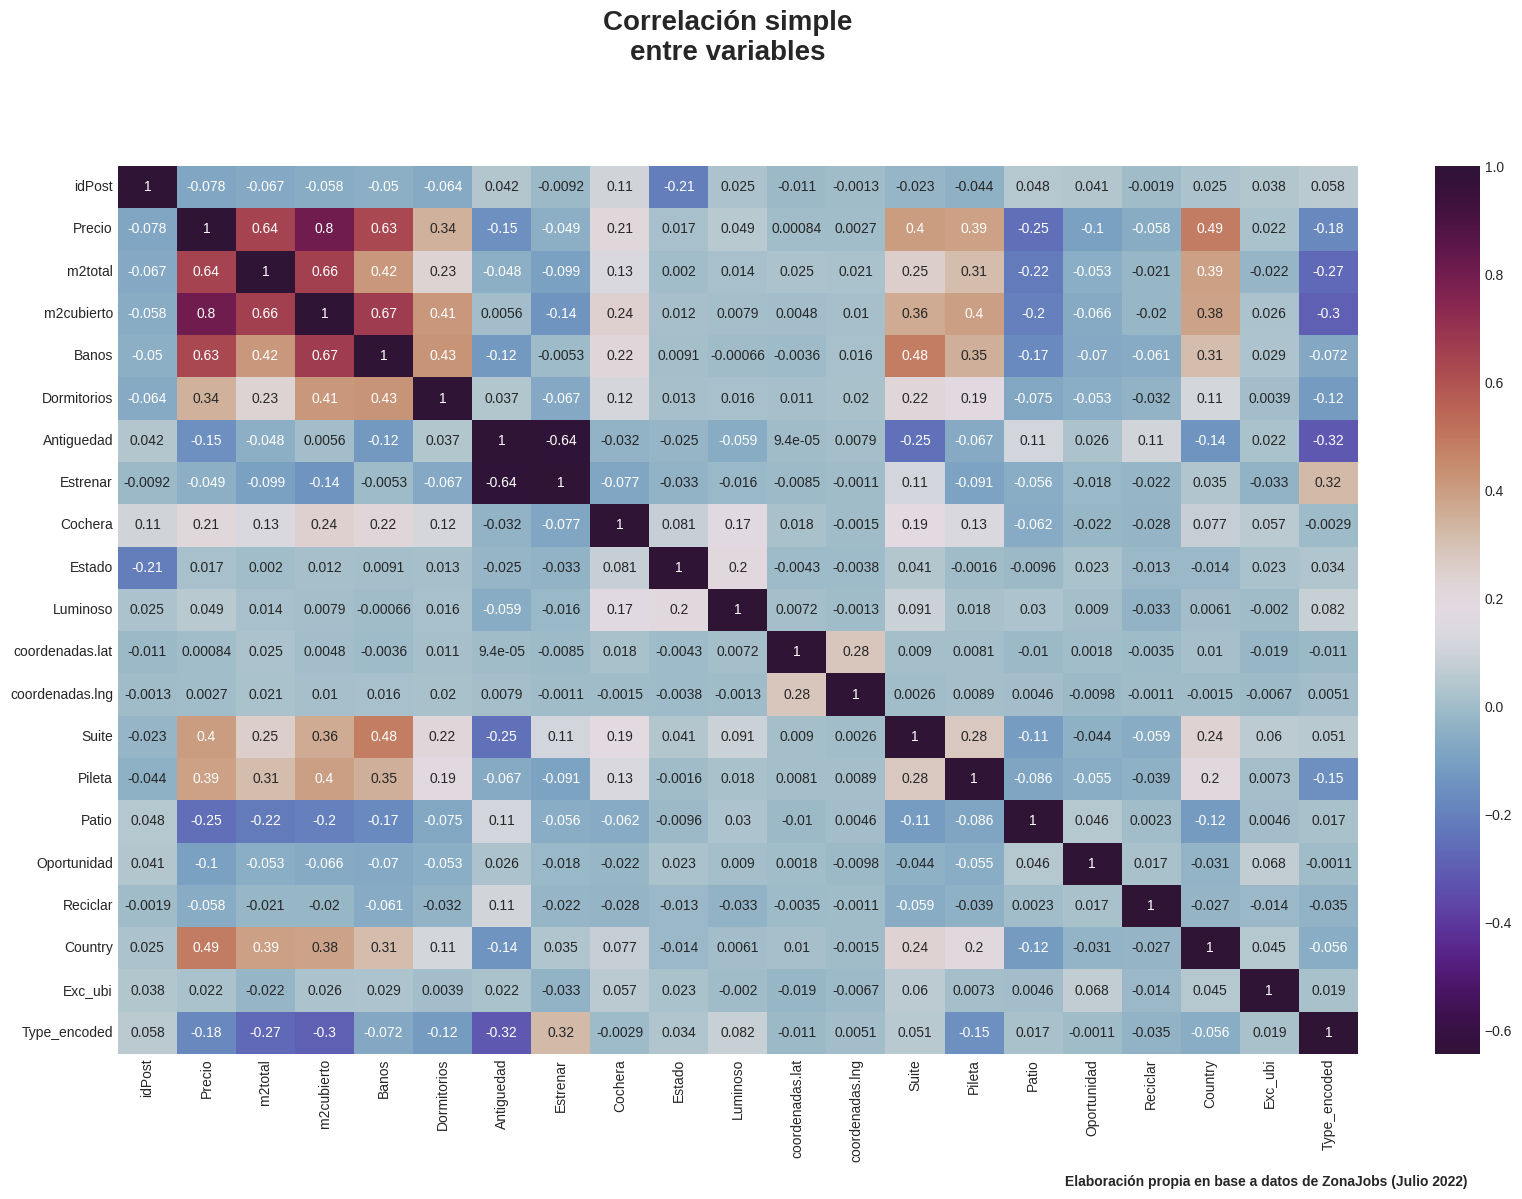

In [ ]:
fig, ax = plt.subplots(figsize = (20, 12))
fig.suptitle("Correlación simple\nentre variables", fontsize = 20, fontweight = "bold", x = 0.43)
sns.heatmap(data.corr(), ax = ax, cmap = "twilight_shifted", annot = True)      # la opción cmap = "twilight_shifted" controla los colores
plt.subplots_adjust(top = 0.85)                                                 # annot = True agrega los coeficientes de correlación
fig.text(.8,0, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.show()

##### *3.1.2 Top 10 Correlaciones mas altas*

Extrayendo información del mapa de calor, se presenta a continuación las 10 correlaciones mas altas.

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Obtener la parte superior de la matriz de correlación sin pares repetidos
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Apilar la parte superior de la matriz en una serie
top_correlations = upper.unstack().sort_values(ascending=False)

# Excluir las correlaciones con valor 1 (correlación perfecta)
top_correlations = top_correlations[top_correlations < 1]

# Mostrar las 10 correlaciones más altas
print(top_correlations.head(10))

m2cubierto   Precio        0.804057
Banos        m2cubierto    0.670462
m2cubierto   m2total       0.655563
m2total      Precio        0.643805
Banos        Precio        0.631283
Country      Precio        0.487143
Suite        Banos         0.481744
Dormitorios  Banos         0.425567
Banos        m2total       0.416092
Dormitorios  m2cubierto    0.413804
dtype: float64


<ipython-input-15-9da0093164f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


##### *3.1.3 Top 10 Correlaciones mas bajas*

In [ ]:
# Obtener la parte inferior de la matriz de correlación sin pares repetidos
lower = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))

# Apilar la parte inferior de la matriz en una serie
bottom_correlations = lower.unstack().sort_values(ascending=True)

# Mostrar las 10 correlaciones más bajas
print(bottom_correlations.head(10))

Antiguedad  Estrenar       -0.644016
            Type_encoded   -0.318289
m2cubierto  Type_encoded   -0.296087
m2total     Type_encoded   -0.267103
Precio      Patio          -0.253247
Antiguedad  Suite          -0.246295
m2total     Patio          -0.219230
idPost      Estado         -0.205761
m2cubierto  Patio          -0.200189
Precio      Type_encoded   -0.178008
dtype: float64


#### ***3.2 ❗ Análisis de correlación Variable vs Target***

Identificando que existe una alta correlación entre las variables **Precio** en conjunto con las variables **m2cubiertos** y **baños**, se analizarán a continuación:

<ipython-input-17-1868456584a5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Precio'], kde=False,


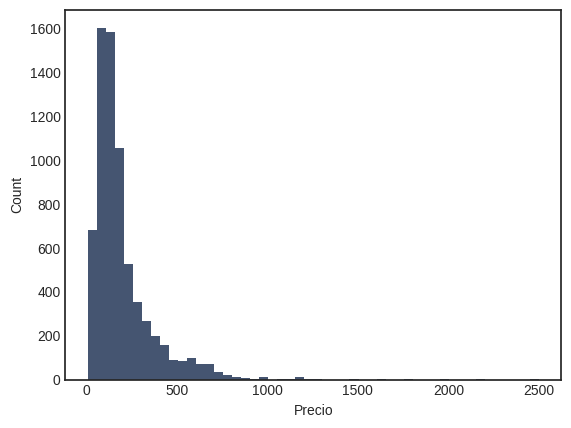

In [ ]:
sns.distplot(data['Precio'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

Es posible observar que la mayoría de los Precios de venta se ubican entre los **100k USD** y **200k USD**.

A continuación observamos la distribución de las variables *m2cubierto* y *Baños*.

<ipython-input-18-e948fd435e89>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['m2cubierto'], kde=False, color="#8A2BE2", hist_kws={"alpha": 1}, ax=axes[0])
<ipython-input-18-e948fd435e89>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Banos'], kde=False, color="#2E8B57", hist_kws

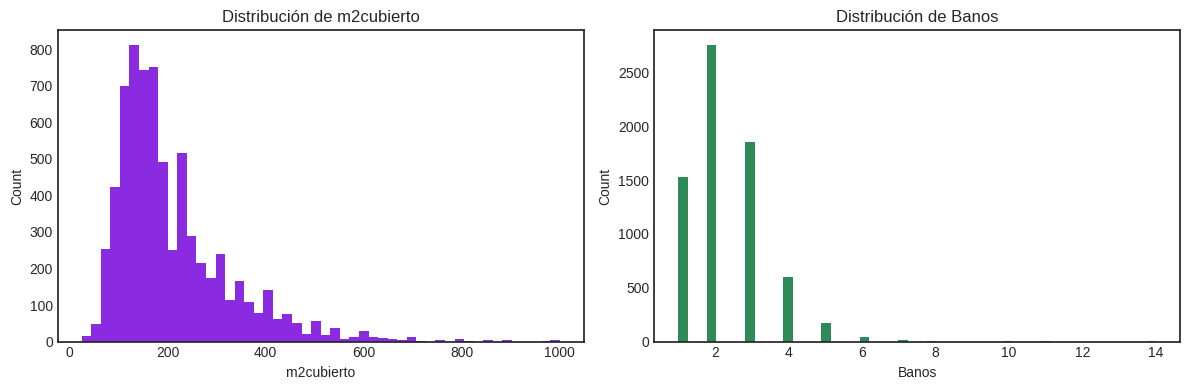

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer gráfico: m2cubierto
sns.distplot(data['m2cubierto'], kde=False, color="#8A2BE2", hist_kws={"alpha": 1}, ax=axes[0])
axes[0].set_title("Distribución de m2cubierto")
axes[0].set_ylabel("Count")

# Segundo gráfico: Banos
sns.distplot(data['Banos'], kde=False, color="#2E8B57", hist_kws={"alpha": 1}, ax=axes[1])
axes[1].set_title("Distribución de Banos")
axes[1].set_ylabel("Count")

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Es posible observar que la mayoría de las viviendas tienen entre **100** y **200 m2 cubiertos**, así como también 2 baños en la gran mayoría de los casos.

A la vez existe una alta correlación positiva entre estas 2 variables y entre **m2 totales** y **m2 cubiertos**.

Se analizarán:

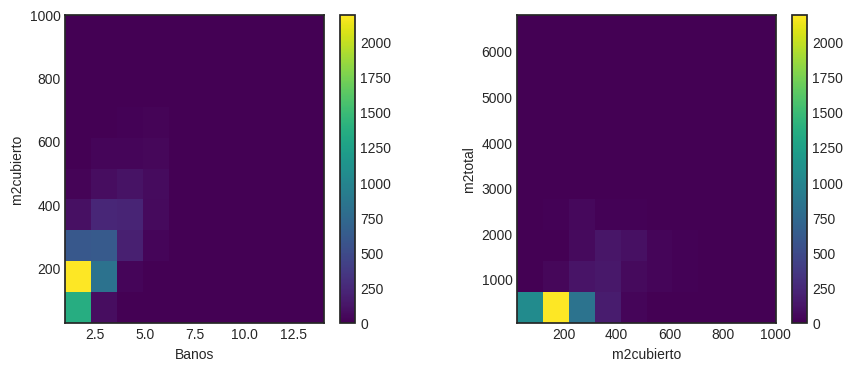

In [ ]:
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(10,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(data['Banos'],
                    data['m2cubierto'],
                    cmap="viridis");
axes[0].set(xlabel="Banos", ylabel="m2cubierto")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(data['m2cubierto'],
                    data['m2total'],
                    cmap="viridis");
axes[1].set(xlabel="m2cubierto", ylabel="m2total")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

Es posible apreciar la fuerte correlación entre cada par.

Tanto para **Baños** y **m2 cubiertos**, vemos que la mayor concentración de datos se da cuando *m2cubierto esta entre 100 y 200m2* y *Baños está aproximadamente entre 1 y 2*.
En cuanto a los m2 totales y cubiertos, observamos que la mayor concentración se da cuando los *m2cubierto se encuentra alrededor de 200* y los *m2totales alrededor de 500*.

Se deduce que:

*   La alta correlación entre m2cubiertos y baños es normal.
*   podríamos quedarnos con la variable m2cubiertos y desestimar los m2totales ya que manteniendo solamente la primera estaríamos haciendo un buen análisis.

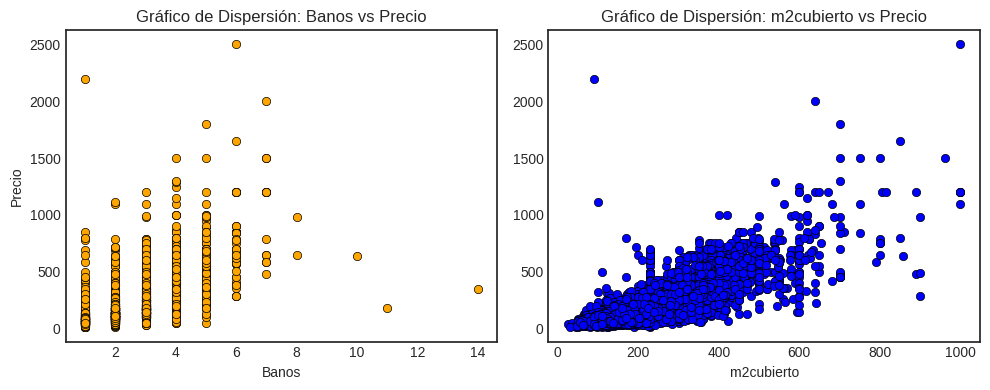

In [ ]:
plt.figure(figsize=(10, 4))

# Primer subgráfico: Banos vs Precio
plt.subplot(1, 2, 1)
plt.scatter(data['Banos'], data['Precio'], color="orange", edgecolors="#000000", linewidths=0.5)
plt.xlabel("Banos")
plt.ylabel("Precio")
plt.title("Gráfico de Dispersión: Banos vs Precio")

# Segundo subgráfico: m2cubierto vs Precio
plt.subplot(1, 2, 2)
plt.scatter(data['m2cubierto'], data['Precio'], color="blue", edgecolors="#000000", linewidths=0.5)
plt.xlabel("m2cubierto")
plt.title("Gráfico de Dispersión: m2cubierto vs Precio")

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

##### *3.2.1 Análisis del Target vs Variables que no tienen tan alta correlación*

A continuación se analiza la relación entre la variable target **Precio** con el resto de variables de interes que no tienen tan alta correlación.

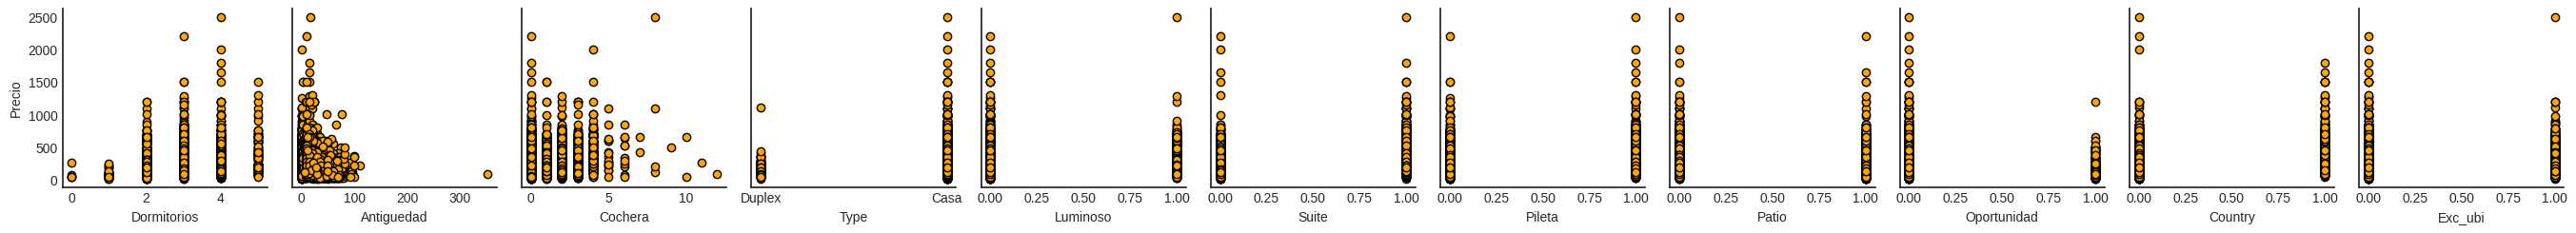

In [ ]:
x_vars = ["Dormitorios", "Antiguedad", "Cochera", "Type", "Luminoso", "Suite", "Pileta","Patio","Oportunidad","Country","Exc_ubi"]
g = sns.PairGrid(data, y_vars=["Precio"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=1);

In [ ]:
Y = data["Precio"]
X = data[["m2cubierto", "Banos", "Dormitorios", "Antiguedad", "Cochera","Luminoso", "Suite", "Pileta","Patio","Oportunidad","Country","Exc_ubi","Type_encoded"]]

#### ***3.3 ❗ Análisis de Regresión Múltiple***

Ahora es posible utilizar estos objetos como argumentos para poder estimar nuestro modelo por OLS utilizando la función OLS() de la librería *statsmodels*, pero esta función sólo permite especificar el modelo.

Para estimar los parámetros y mostrar los resultados, es necesario recurrir a los métodos **fit()** y **summary()**.

In [ ]:
# Modelo de mínimos cuadrados ordinarios.

MiModelo = sm.OLS(Y, sm.add_constant(X))  # Construimos el modelo (agregando una constante con add_constant de Statsmodels)
Resultados = MiModelo.fit()               # Estimamos el modelo y guardamos los resultados
print(Resultados.summary())               # Mostramos los resultados

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1372.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:56:29   Log-Likelihood:                -41318.
No. Observations:                6964   AIC:                         8.266e+04
Df Residuals:                    6950   BIC:                         8.276e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -25.7355      5.538     -4.647   

Según estos resultados, entonces:

1.   En la primer y ultima parte vemos resultados globales del modelo

2.   En medio se observan resultados aplicables a cada una de las X y para la variable constante.

3.   Se confirma observando los coeficientes que:

> - Hay Relación positiva entre el Precio de la propiedad y las variables m2cubierto, Baños.
> - Hay una relación negativa entre el Precio y las variables Antiguedad y "Cochera".
> - Mayormente los coeficientes de las variables explicativas resultaron significativamente distintos de 0 (incluida la constante), con p-values menores a 1% (salvo para las variables "Dormitorios", "Luminoso", "Exc_ubi" y "Type_encoded"). Esto significan que son buenas variables explicativas del Precio de la propiedad.

2.   El R2 del modelo es 0.72, lo que significa que el 72% de la variabilidad observada en el Precio de la propiedad está asociada en forma lineal con las variables explicativas propuestas por nuestro modelo

##### *3.3.1 Diagnóstico: contrastes básicos de Significación individual y Global*

Casi todos los coeficientes de las variables explicativas resultaron significativamente distintos de 0, con p-values menores a 0.05, incluida la constante. Lo mismo sucede para el modelo en forma global (en este caso observamos que el Prob (F-statistic) es 0.00, que es menor al nivel Alpha de significación del 0.05).

##### *3.3.2 Verificación de Supuestos y Test`s*

En este apartado daremos inicio a la evaluación de las herramientas econométricas y su relación.

###### *3.3.2.1 Problemas de especificación / Test Reset de Ramsey*
En los Gráfico de *residuos vs valores ajustados* no debe haber tendencias o patrones.

In [ ]:
Residuos = Resultados.resid                    # guardamos los residuos
Valores_ajustados = Resultados.predict()       # guardamos los valores ajustados

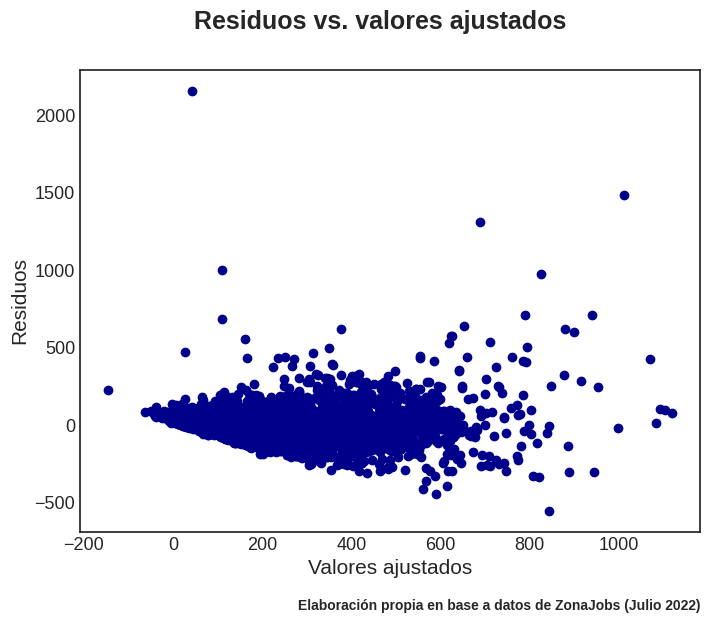

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Residuos vs. valores ajustados", fontsize = 18, fontweight = "bold")
ax.scatter(Valores_ajustados, Residuos, color = "darkblue")
#ax.set_ylim(-800, 800)
ax.set_xlabel("Valores ajustados", fontsize = 15)
ax.set_ylabel("Residuos", fontsize = 15)
ax.tick_params(labelsize = 13)
fig.text(.9,-.02, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.show()

Primeramente, es posible notar a partir de este gráfico es que la varianza va aumentando.

Para corroborar que no haya un patrón específico en los residuos y los valores, se realizará el *test RESET de Ramsey*.

In [ ]:
from statsmodels.stats.outliers_influence import reset_ramsey   # importamos la función
ResultadosTestRESET = reset_ramsey(Resultados, degree=3) # Con "degree=3" es para incluir hasta un término cúbico y no quedarse en un cuadrático
print(ResultadosTestRESET)

<F test: F=314.30460465303526, p=2.1145592275163333e-131, df_denom=6.95e+03, df_num=2>


Se obtiene el estadístico F, el p-value y los grados de libertad del contraste. Estos resultados del test RESET de Ramsey parece indicar que agregar términos cuadráticos y cúbicos podría mejorar el modelo, ya que, el p-value es menor a 0.05 por lo que contamos con evidencia suficiente para rechazar la Hipótesis Nula (la especificación lineal es la correcta).

In [ ]:
# Vamos a probar con el test Rainbow
ResultadosTestRainbow = sms.linear_rainbow(Resultados)
print(ResultadosTestRainbow)

# Mejoramos la salida
ResultadosTestRainbow = sms.linear_rainbow(Resultados)
Nombres = ["Estadístico F", "p-value"]
pd.Series(ResultadosTestRainbow, index = Nombres)


(0.8670913201291804, 0.9999867441850724)


Estadístico F    0.867091
p-value          0.999987
dtype: float64

En este test, no se encuentra problema de especificación alguno.

###### *3.3.2.2 Multicolinealidad*

Se analizarán las X para determinar si están correlacionadas entre sí. (Correlaciones mayores a 0.60 pueden ser indicio de que hay un problema; también hay indicios de esto cuando es alta la significatividad global del modelo).

In [ ]:
# Examinemos que no haya multicolinealidad observando la correlación entre las variables del data frame
data1 = data[["Precio", "m2cubierto", "Banos", "Dormitorios", "Antiguedad", "Cochera","Luminoso", "Suite", "Pileta","Patio","Oportunidad","Country","Exc_ubi", "Type_encoded"]]

# Calcular la matriz de correlación
matriz_corr = data1.corr()

# Encontrar las combinaciones de variables con correlación mayor a 0.60
var_alta_corr = []
objetivo = 0.60

for i in range(len(matriz_corr.columns)):
    for j in range(i):
        if abs(matriz_corr.iloc[i, j]) > objetivo:
            colname_i = matriz_corr.columns[i]
            colname_j = matriz_corr.columns[j]
            correlation_value = matriz_corr.iloc[i, j]
            var_alta_corr.append((colname_i, colname_j, correlation_value))

# Mostrar las variables altamente correlacionadas y sus valores de correlación
print("Variables con correlación mayor a 0.60 entre sí:")
for var1, var2, correlacion in var_alta_corr:
    print(f"{var1} - {var2}: {correlacion:.2f}")

Variables con correlación mayor a 0.60 entre sí:
m2cubierto - Precio: 0.80
Banos - Precio: 0.63
Banos - m2cubierto: 0.67


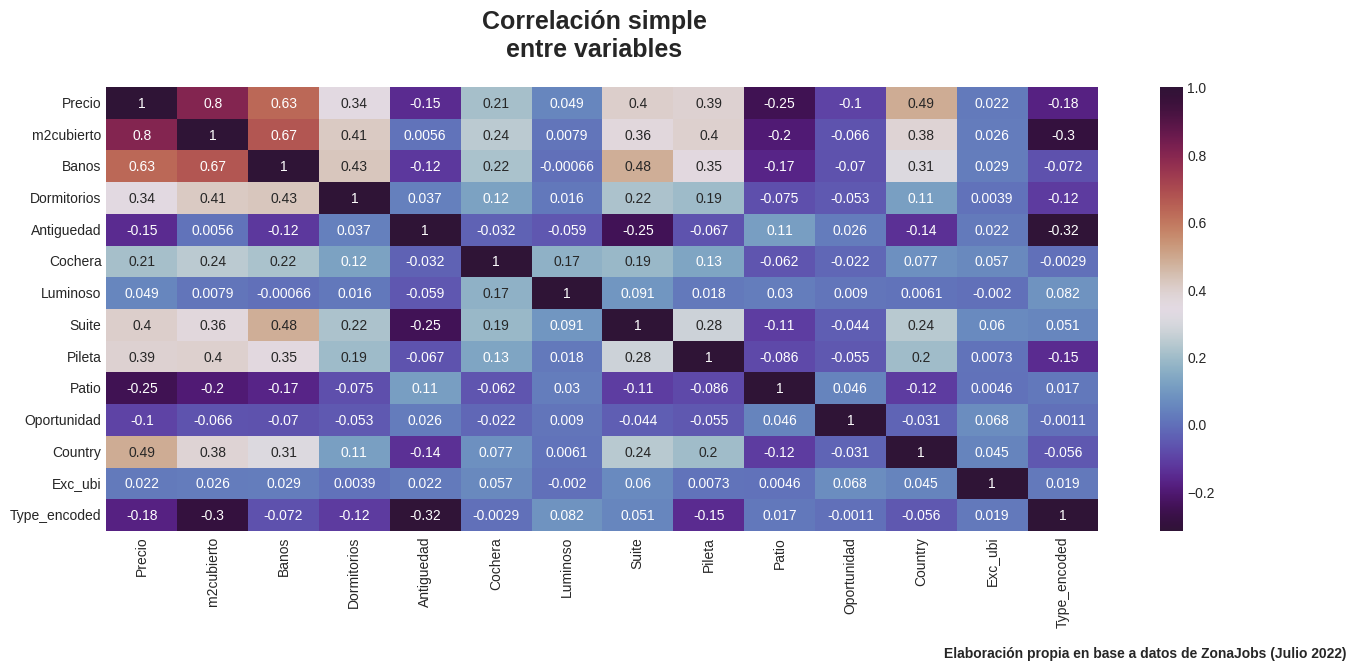

In [ ]:
#Recurrimos a un mapa de calor (heat map) para las correlaciones.

fig, ax = plt.subplots(figsize = (16, 6))
fig.suptitle("Correlación simple\nentre variables", fontsize = 18, fontweight = "bold", x = 0.43)
sns.heatmap(data1.corr(), ax = ax, cmap = "twilight_shifted", annot = True)      # la opción cmap = "twilight_shifted" controla los colores
plt.subplots_adjust(top = 0.85)                                                 # annot = True agrega los coeficientes de correlación
fig.text(.9,-.1, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.show()

La correlación más alta (0.80) es entre **Precio y m2cubierto**, pero **Precio** es la variable dependiente.

Existe alta correlación (mayor al 0.60) entre las variables **Baños y m2cubiertos** que en principio debería ser tenida en cuenta. Esto es debido a que mientras más cantidad de baños posea un inmueble, más m2 cubiertos poseerá.

También podemos verificar la ausencia de multicolinealidad calculando los **factores de inflación de varianza (VIF)** con la función `variance_inflation_factor` del módulo `stats.outliers_influence` de la librería `Statsmodels`.

Para no tener que calcular uno para cada variable explicativa, podemos usar un for loop.

La función `variance_inflation_factor` requiere como argumentos una matriz de exógenas del modelo y la indicación de sobre cuál de estas variables hay que calcular el VIF.

Se hará entonces, exhibir los resultados en una tabla (data frame) con los nombres de las variables (excepto la constante) en la primer columna y los VIF en la segunda, calculados de manera iterativa con el for loop usando a cada columna de la matriz de exógenas excepto la constante.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor      # importamos la función
exog = sm.add_constant(X)                                                       # definimos las exógenas (más una constante)
pd.DataFrame({'Variables':exog.columns[1:], 'VIF':[variance_inflation_factor(exog.values, i+1)
                                                   for i in range(len(exog.columns[1:]))]})

,Variables,VIF
0,m2cubierto,2.417738
1,Banos,2.231881
2,Dormitorios,1.283168
3,Antiguedad,1.225740
4,Cochera,1.113462
5,Luminoso,1.047369
6,Suite,1.427205
7,Pileta,1.237508
8,Patio,1.060353
9,Oportunidad,1.013515


Observar que ninguno de los VIF es demasiado alto (mayor a 10), confirmando la ausencia de multicolinealidad.

##### *3.3.3 Verificación de Supuestos sobre el error*

Se constata si la media de los residuos es próxima a cero.

In [ ]:
np.mean(Residuos)

-1.834661339819945e-12

El resultado está expresado en notación exponencial y muestra que la media de los residuos es prácticamente cero.

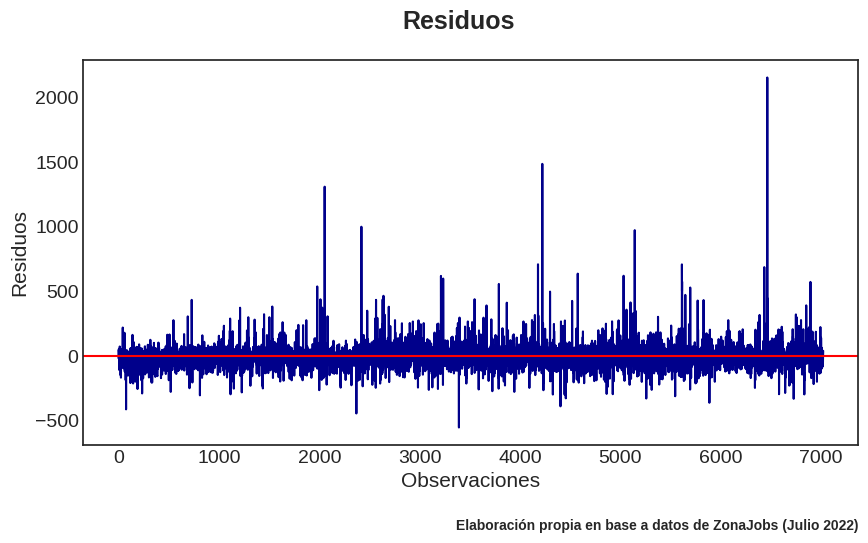

In [ ]:
# Vamos a examinar los residuos en un gráfico
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle("Residuos", fontsize = 18, fontweight = "bold")
ax.plot(Residuos, color = "darkblue")
ax.set_xlabel("Observaciones", fontsize = 15)
ax.set_ylabel("Residuos", fontsize = 15)
ax.tick_params(labelsize = 14)
fig.text(.9,-.06, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.axhline(y=0, color="red")             # aquí agregamos una recta para representar la media teórica cero
plt.show()

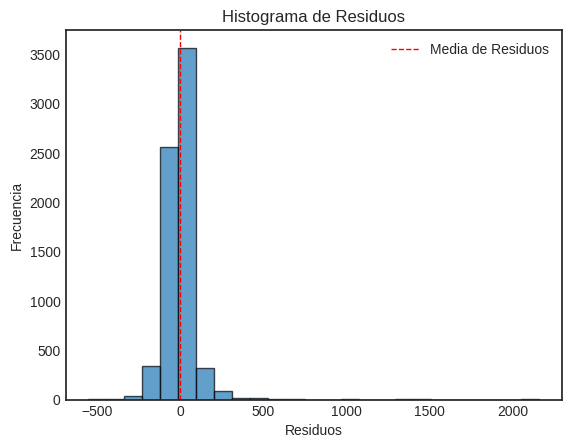

In [ ]:
plt.hist(Residuos, bins=25, edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label='Media de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.legend()
plt.show()

El histograma permite comprobar que los residuos estan centrados alrededor de cero, por lo que el supuesto estaría OK.

Este histograma a su vez nos permite comprobar el supuesto de Normalidad.

###### *3.3.3.1 Normalidad*

*   📌 Test Jarque - Bera

Se evalua si los residuos del modelo de nuestro ejemplo tienen distribución normal. Utilizamos primero la prueba de Jarque-Bera (ya viene en la salida de nuestro modelo estimado por OLS.)

In [ ]:
# El resultado más completo
ResultadosTestJB = sms.jarque_bera(Residuos)
Nombres = ["Jarque-Bera", "p-value", "Asimetría", "Curtosis"]
pd.Series(ResultadosTestJB, index = Nombres)

Jarque-Bera    1.452133e+06
p-value        0.000000e+00
Asimetría      4.138721e+00
Curtosis       7.325642e+01
dtype: float64

**Conclusión**: *Observar que el p-value es ampliamente menor al nivel de significación usual. Por lo tanto, se rechaza la hipótesis de normalidad.*

*   📌 Test omnibus o K2 de D´Agostino

In [ ]:
ResultadosTestK2 = sms.omni_normtest(Residuos)
Nombres = ["Estadístico K2", "p-value"]
pd.Series(ResultadosTestK2, index = Nombres)

Estadístico K2    6738.114809
p-value              0.000000
dtype: float64

*   📌 Test Kolmogorov-Smirnov

In [ ]:
ResultadosTestKS = sms.diagnostic.kstest_normal(Residuos)
Nombres = ["Estadístico KS", "p-value"]
pd.Series(ResultadosTestKS, index = Nombres)

Estadístico KS    0.114787
p-value           0.001000
dtype: float64

*   📌 Test Shapiro-Wilk

In [ ]:
from scipy.stats import shapiro               # importamos la función shapiro de la librería scipy
ResultadosTestSW = shapiro(Residuos)
Nombres = ["Estadístico SW", "p-value"]
pd.Series(ResultadosTestSW, index = Nombres)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Estadístico SW    0.790663
p-value           0.000000
dtype: float64

*   📌 Exploración normalidad con gráficos

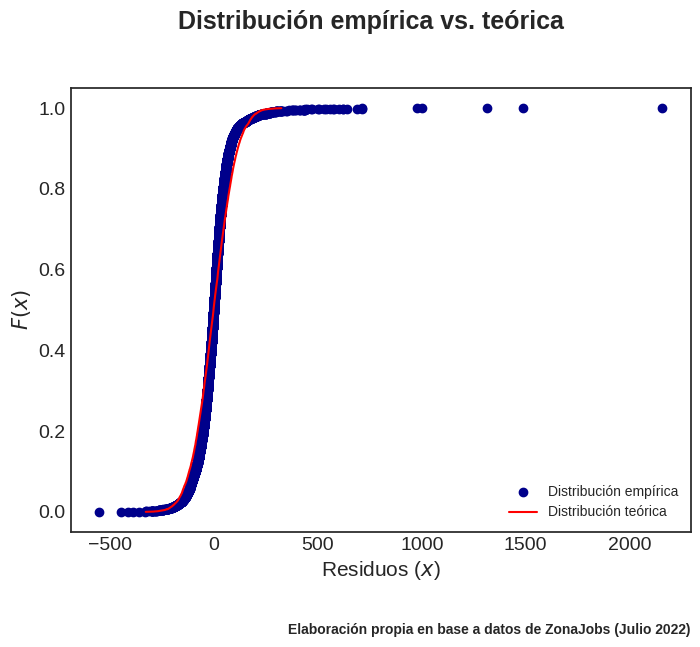

In [ ]:
# Primero armamos la función de distribución observada de nuestros residuos
x = np.sort(Residuos)              # ordenamos los residuos
n = x.size                         # tamaño total de la muestra
y = np.arange(1, n+1) / n          # calculamos las probabilidades acumuladas por cada valor observado en orden

# Luego obtenemos la función de distribución teórica de una normal
Residuos_teoricos = np.random.normal(loc = np.mean(Residuos),   # obtenemos una muestra aleatoria proveniente de una
                    scale = np.std(Residuos), size = 10000)     # distribución normal con la media y desv.est. de nuestros residuos
x_teor = np.sort(Residuos_teoricos)       # ordenamos la muestra aleatoria
n_teor = x_teor.size                      # guardamos el tamaño de esta muestra
y_teor = np.arange(1, n_teor+1) / n_teor  # calculamos las probabilidades acumuladas por sus valores

# Por último, superponemos ambas distribuciones en un mismo gráfico
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Distribución empírica vs. teórica", fontsize = 18, fontweight = "bold")
ax.scatter(x, y, color = "darkblue", label = "Distribución empírica")
ax.plot(x_teor, y_teor, color = "red", label = "Distribución teórica")
ax.set_xlabel("Residuos ($x$)", fontsize = 15)
ax.set_ylabel("$F(x)$", fontsize = 15)
ax.tick_params(labelsize = 14)
ax.legend()
fig.text(.9,-.06, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.subplots_adjust(top = 0.85)
plt.show()

**Conclusión**: *Observar que los puntos azules (distribución empírica) no se alejan demasiado de la curva roja (distribución teórica). Por lo tanto, no parece haber un problema serio de falta de normalidad.*

*   📌 QQ - Plot

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


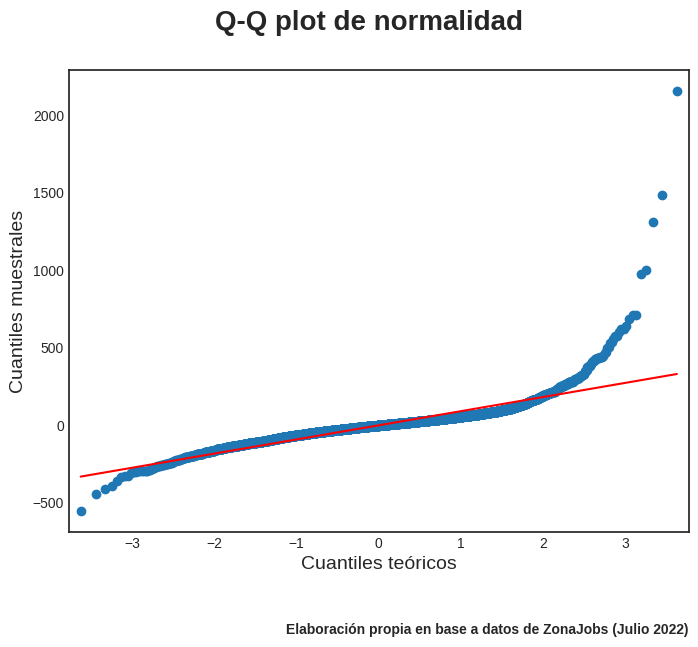

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Q-Q plot de normalidad", size = 20, fontweight = "bold")
sm.qqplot(Residuos, ax = ax, line = "s", color = "darkblue")
ax.set_xlabel("Cuantiles teóricos", fontsize = 14)
ax.set_ylabel("Cuantiles muestrales", fontsize = 14)
fig.text(.9,-.06, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.show()

**Conclusiones Generales**:

Luego de analizado los Test de Jarque-Bera, omnibus o K2 de D´Agostino, Shapiro Wilks y los métodos gráficos de Distribución empírica vs. teórica y Q-Q plot de normalidad, se concluye:

*  Es necesario realizar un análisis mas detallado para determinar el tipo de distribución.

El supuesto acompaña a lo analizado en el gráfico de histograma de los residuos del modelo y los gráficos Q-Q plot de normalidad y el de Dist Empírica vs teórica.

###### *3.3.3.2 Heteroscedasticidad*

Se verifica el problema de heteroscedasticidad o varianza no constante del error.

Observando el gráfico de los residuos al cuadrado versus los valores ajustados del modelo para revisar si puede haber algún patrón o relación de dependencia.

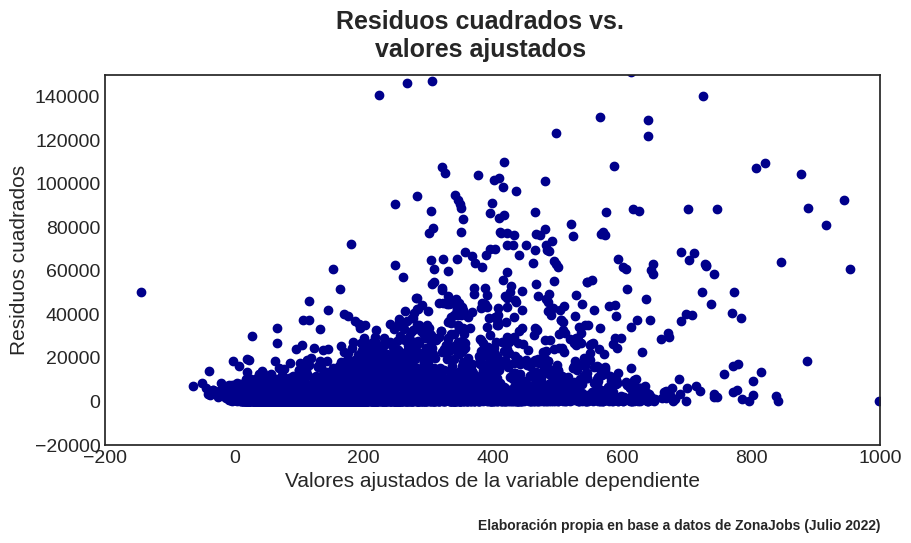

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle("Residuos cuadrados vs.\nvalores ajustados", fontsize = 18, fontweight = "bold")
ax.scatter(Valores_ajustados, Residuos**2, color = "darkblue")                  # ** es el operador potencia
ax.set_xlabel("Valores ajustados de la variable dependiente", fontsize = 15)
ax.set_ylabel("Residuos cuadrados", fontsize = 15)
ax.set_xlim(-200, 1000)
ax.set_ylim(-20000, 150000)
ax.tick_params(labelsize = 14)
fig.text(.9,-.06, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.subplots_adjust(top = 0.85)
plt.show()

Analizando el gráfico, se observa un posible indicio de heteroscedasticidad que es conveniente revisar con algún contraste más formal.

Este supuesto surge a partir de que la varianza va incrementando a medida que aumentan los valores ajustados de la variable dependiente.

*   📌 Test de White

Es una prueba de multiplicadores de Lagrange (LM test).

In [ ]:
exog = sm.add_constant(X)
ResultadosTestWhite = sms.het_white(Residuos, exog)       # Aplicamos el test y guardamos los resultados
Nombres = ["Estadístico LM", "p-value del estadístico LM", "Estadístico F", "p-value del estadístico F"]
pd.Series(ResultadosTestWhite, index = Nombres)           # Presentamos los resultados de una manera más ordenada

Estadístico LM                5.797284e+02
p-value del estadístico LM    3.166178e-70
Estadístico F                 6.495447e+00
p-value del estadístico F     4.276667e-74
dtype: float64

**Conclusión**: *Los resultados muestran evidencia de heteroscedasticidad y rechazan el supuesto de homoscedasticidad.*

*   📌 Test Test Breusch-Pagan

In [ ]:
ResultadosTestBP = sms.het_breuschpagan(Residuos, exog)    # Aplicamos el test y guardamos los resultados
pd.Series(ResultadosTestBP, index = Nombres)

Estadístico LM                2.083955e+02
p-value del estadístico LM    2.569261e-37
Estadístico F                 1.649170e+01
p-value del estadístico F     6.427245e-38
dtype: float64

**Conclusión**: *Los resultados muestran evidencia de heteroscedasticidad y rechazan el supuesto de homoscedasticidad*.

*   📌 Test Goldfeld-Quandt

In [ ]:
ResultadosTestGQ = sms.het_goldfeldquandt(Y, exog, drop = 0.33)
# observar que a diferencia de los anteriores, requiere como argumentos la variable endógena y las regresoras exógenas
# la opción drop indica que porción del centro es descarta
# está disponible también la opción alternative con “increasing”, “decreasing”, “two-sided” para distintos tipos de heteroscedasticidad
# por defecto prueba "increasing"
Nombres = ["Estadístico F", "p-value", "Hipótesis alternativa"]
pd.Series(ResultadosTestGQ, index = Nombres)

Estadístico F              1.565559
p-value                         0.0
Hipótesis alternativa    increasing
dtype: object

**Conclusión**: *En este caso, los resultados señalan que se rechaza la hipótesis nula de homoscedasticidad (omitiendo el 33% de las observaciones centrales).*

Evidenciando heteroscedasticidad, se proyecta atenuarla por medio de la transformación logarítmica.

In [ ]:
# Lista de columnas a las que aplicaremos la transformación logarítmica
columnas_logaritmicas = ["Dormitorios","Cochera"]

# Aplicar la transformación logarítmica a las columnas seleccionadas
data_log = data1.copy()  # Copiamos el DataFrame original para preservarlo
data_log[columnas_logaritmicas] = np.log(data_log[columnas_logaritmicas])

data_log.sample(5)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Precio,m2cubierto,Banos,Dormitorios,Antiguedad,Cochera,Luminoso,Suite,Pileta,Patio,Oportunidad,Country,Exc_ubi,Type_encoded
5619,499.0,430,4,1.386294,20,-inf,0,0,0,0,0,0,0,0
4832,48.0,119,1,1.098612,66,-inf,0,0,0,0,0,0,0,0
2964,105.0,130,1,0.693147,7,0.000000,1,0,0,1,0,0,0,0
115,200.0,416,3,1.098612,0,1.386294,0,1,1,1,0,0,0,0
1560,152.0,229,4,1.609438,0,0.693147,0,1,0,1,1,0,0,0


In [ ]:
data_log.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Precio,m2cubierto,Banos,Dormitorios,Antiguedad,Cochera,Luminoso,Suite,Pileta,Patio,Oportunidad,Country,Exc_ubi,Type_encoded
count,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000
mean,196.193465,209.797961,2.334578,-inf,16.438110,-inf,0.180213,0.380241,0.271396,0.598507,0.063038,0.085583,0.192131,0.190695
std,172.435126,117.096822,1.067884,NaN,20.104025,NaN,0.384392,0.485481,0.444712,0.490236,0.243050,0.279767,0.394004,0.392877
min,9.999000,25.000000,1.000000,-inf,0.000000,-inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,130.000000,2.000000,0.693147,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,144.949500,178.000000,2.000000,1.098612,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,232.750000,250.000000,3.000000,1.098612,30.000000,0.693147,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2500.000000,1000.000000,14.000000,1.609438,352.000000,2.484907,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
''' Al observar el nuevo data set que tenemos ahora con datos logarítmicos, observamos que la varibale "Dormitorios" cuenta con valores infinitos,
pero que podemos reemplazarlos con 0. Es necesario realizar este paso porque en caso contrario, esto podría generarnos problemas a futuro'''

data_log['Dormitorios'] = data_log['Dormitorios'].replace([np.inf, -np.inf], 0)
data_log['Cochera'] = data_log['Cochera'].replace([np.inf, -np.inf], 0)
#data_log['Antiguedad'] = data_log['Antiguedad'].replace([np.inf, -np.inf], 0)

In [ ]:
data_log.describe()

,Precio,m2cubierto,Banos,Dormitorios,Antiguedad,Cochera,Luminoso,Suite,Pileta,Patio,Oportunidad,Country,Exc_ubi,Type_encoded
count,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000
mean,196.193465,209.797961,2.334578,1.025781,16.438110,0.315981,0.180213,0.380241,0.271396,0.598507,0.063038,0.085583,0.192131,0.190695
std,172.435126,117.096822,1.067884,0.241243,20.104025,0.418722,0.384392,0.485481,0.444712,0.490236,0.243050,0.279767,0.394004,0.392877
min,9.999000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,130.000000,2.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,144.949500,178.000000,2.000000,1.098612,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,232.750000,250.000000,3.000000,1.098612,30.000000,0.693147,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2500.000000,1000.000000,14.000000,1.609438,352.000000,2.484907,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = data_log.drop(columns=['Precio'])
y = data_log['Precio']

In [ ]:
# Ajusta el modelo OLS con términos logarítmicos
Modelo_aj = sm.OLS(Y, sm.add_constant(X))  # Asegúrate de incluir una constante si es necesario
Resultados_aj = Modelo_aj.fit()

# Imprime un resumen del modelo
print(Resultados_aj.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1372.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:57:59   Log-Likelihood:                -41318.
No. Observations:                6964   AIC:                         8.266e+04
Df Residuals:                    6950   BIC:                         8.276e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -24.3976      5.403     -4.516   

In [ ]:
Residuos = Resultados_aj.resid                    # guardamos los residuos
Valores_ajustados = Resultados_aj.predict()

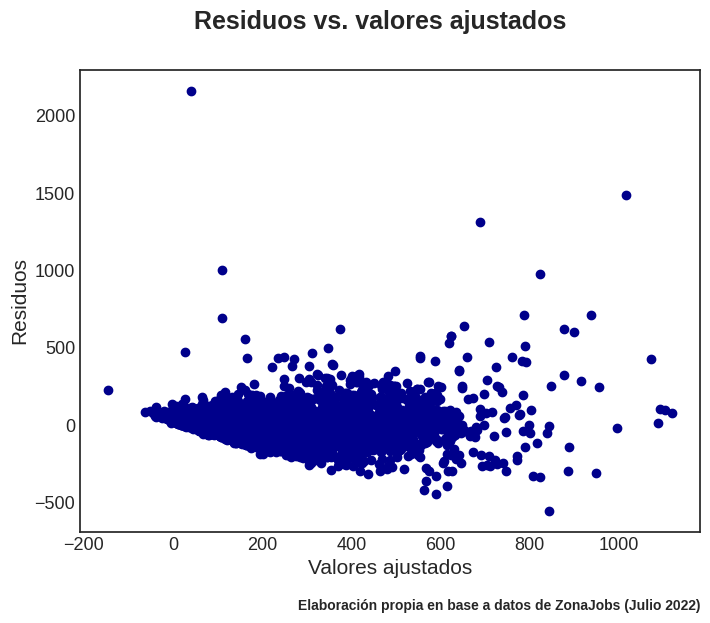

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Residuos vs. valores ajustados", fontsize = 18, fontweight = "bold")
ax.scatter(Valores_ajustados, Residuos, color = "darkblue")
ax.set_xlabel("Valores ajustados", fontsize = 15)
ax.set_ylabel("Residuos", fontsize = 15)
ax.tick_params(labelsize = 13)
fig.text(.9,-.02, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.show()

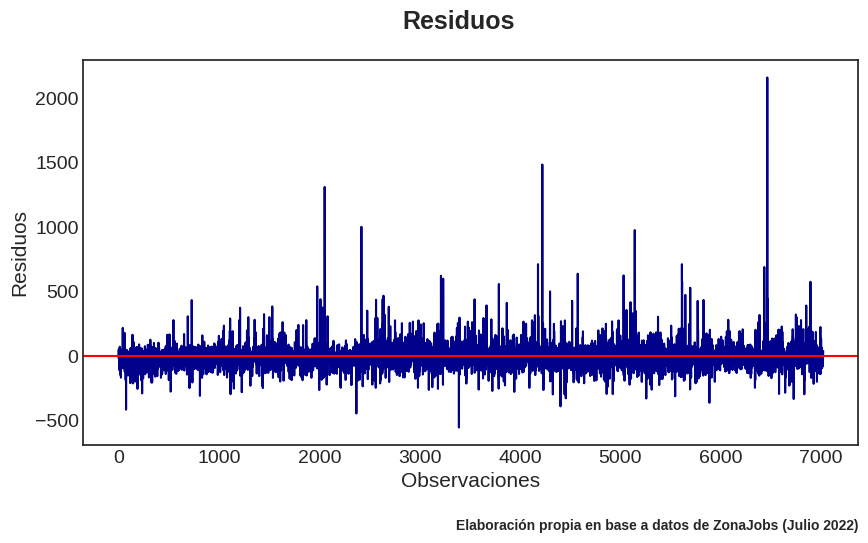

In [ ]:
# Vamos a examinar los residuos en un gráfico
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle("Residuos", fontsize = 18, fontweight = "bold")
ax.plot(Residuos, color = "darkblue")
ax.set_xlabel("Observaciones", fontsize = 15)
ax.set_ylabel("Residuos", fontsize = 15)
ax.tick_params(labelsize = 14)
fig.text(.9,-.06, "Elaboración propia en base a datos de ZonaJobs (Julio 2022)", fontsize = 10, fontweight = "bold", ha = "right")
plt.axhline(y=0, color="red")             # aquí agregamos una recta para representar la media teórica cero
plt.show()

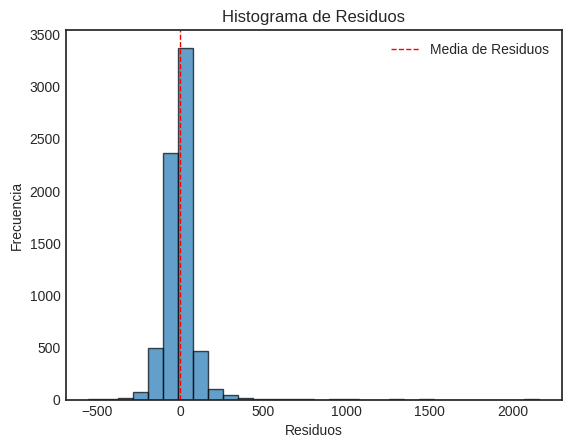

In [ ]:
plt.hist(Residuos, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label='Media de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.legend()
plt.show()

Antes de pasar a los modelados, para que todos los algoritmos funcionen correctamente con nuestros datos, necesitamos escalar las características de nuestro conjunto de datos. Para ello, utilizaremos una útil función llamada StandardScaler() del popular paquete Scikit-Learn Python. Esta función estandariza las características restando la media y escalando a la varianza unitaria. Funciona con cada característica de forma independiente.

### **4. MODELOS DE PREDICCIÓN** 📈

Hasta el momento se realizó la curaduría de datos, y las pruebas estadísticas.
A continuación se avanzará con los modelos de predicción.

Bien sea para la técnica correspondiente (*Regresión lineal, Vecino más cercano, Máquinas de vectores de soporte, etc.*), se llevarán adelante los siguientes pasos en la construcción del modelo:

1.   Elegir un algoritmo que implemente la técnica correspondiente.
2.   Buscar una combinación de parámetros eficaz para el algoritmo elegido.
3.   Crear un modelo utilizando los parámetros encontrados.
4.   Entrenar (**ajustar**) el modelo en el conjunto de datos de entrenamiento.
5.   Probar el modelo en el conjunto de datos de prueba y obtener los resultados.

#### ***4.1 🎲 Shuffle Test & Train***

Separación de las muestras para la posterior evaluación de los modelos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_log.drop('Precio', axis=1), data_log[['Precio']],
    test_size=0.3, random_state=3)

Transformación de las escalas tanto para las features, como para el Target Precio.

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

## Aplicamos la transformación de escala sobre los features
scaler_X.fit(X_train)
X_scaled_train = scaler_X.transform(X_train)
X_scaled_test  = scaler_X.transform(X_test)

## Aplicamos la transformación de escala sobre la variable objetivo
scaler_y.fit(y_train.values.reshape(-1, 1))
y_scaled_train = scaler_y.transform(y_train.values.reshape(-1, 1))[:,0]
y_scaled_test  = scaler_y.transform(y_test.values.reshape(-1, 1))[:,0]

Una vez realizados los pasos anteriores, se procede a realizar el análisis con los diferentes algorítmos/métodos de aprendizaje:

#### ***4.2 🎯 Modelo de Regresión Múltiple***

Se construye un modelo de regresión lineal múltiple que permitirá predecir los precios de las propiedades en base a las variables:

"Precio", "m2cubierto", "Banos", "Dormitorios", "Antiguedad", "Cochera","Luminoso", "Suite", "Pileta", "Patio", "Oportunidad", "Country", "Exc_ubi",  "Type_encoded".

Para la Regresión Lineal, se eligirá dos implementaciones algorítmicas: **Ridge Regression** y **Elastic Net**.

Se utilizarán las implementaciones proporcionadas en el paquete Scikit-Learn de estos algoritmos.

##### *4.2.1 ⚙️ Ridge Regression*

En primer lugar, se utilizará **GridSearchCV()** para buscar los mejores parámetros del modelo en un espacio de parámetros proporcionado por nosotros.

El parámetro **alpha** representa la fuerza de regularización, fit_intercept determina si se debe calcular el intercepto para este modelo, y solver controla qué solver utilizar en las rutinas computacionales.

In [ ]:
parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_scaled_train, y_scaled_train)
print("Mejores parámetros:")
print(clf.best_params_)

Mejores parámetros:
{'alpha': 100, 'fit_intercept': False, 'solver': 'sparse_cg'}


Ahora se construirá el modelo *Ridge* con los mejores parámetros encontrados:

In [ ]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

A continuación, se entrena el modelo utilizando el conjunto de entrenamiento (X_train, y_train)

In [ ]:
ridge_model.fit(X_scaled_train, y_scaled_train)

Ridge(alpha=100, fit_intercept=False, random_state=3, solver='sparse_cg')

Por último, se prueba el modelo en *X_test*.

A continuación, se evalúa el rendimiento del modelo comparando sus predicciones con los valores reales de *y_test* mediante la métrica MAE

In [ ]:
## Un modelo alimentado con datos escalados devuelve predicciones también
## escaladas
pred_scaled_train = ridge_model.predict(X_scaled_train)
pred_scaled_test  = ridge_model.predict(X_scaled_test)

## Para evaluar las predicciones, debemos aplicar la transformación de escala
## inversa
pred_train_ridge = scaler_y.inverse_transform(pred_scaled_train.reshape(-1, 1))
pred_test_ridge  = scaler_y.inverse_transform(pred_scaled_test.reshape(-1, 1))

ridge_mae = mean_absolute_error(y_test, pred_test_ridge)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 57.88440370314623


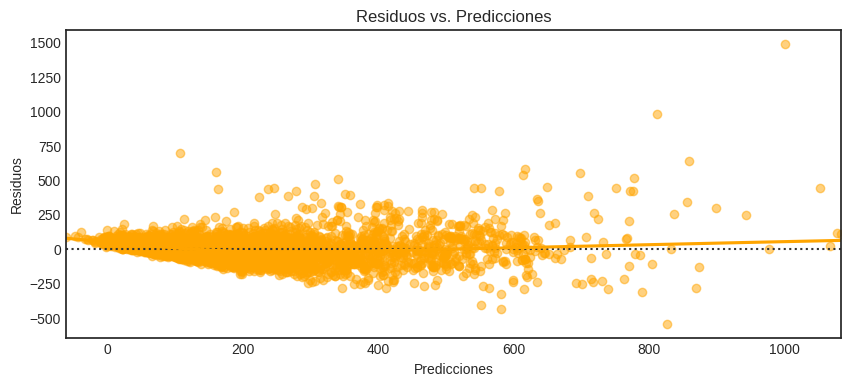

In [ ]:
y_pred = pred_train_ridge

# Calcula los residuos
residuos = y_train - y_pred

# Crea el residplot
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.residplot(x=y_pred, y=residuos, lowess=True, color='Orange', ax=ax, scatter_kws={'alpha': 0.5})
ax.set_xlabel('Predicciones')
ax.set_ylabel('Residuos')
ax.set_title('Residuos vs. Predicciones')
plt.show()

In [ ]:
predictions_ridge = pred_test_ridge
predictions_train_ridge = pred_train_ridge

# Si hay predicciones negativas, las igualamos a 0
for i,num in enumerate(predictions_ridge):
    if num<0:
        predictions_ridge[i] = 0

print('MAE-test:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MAE-train:', metrics.mean_absolute_error(y_train, predictions_train_ridge))
print()
print('MSE-test:', metrics.mean_squared_error(y_test, predictions_ridge))
print('MSE-train:', metrics.mean_squared_error(y_train, predictions_train_ridge))
print()
print('RMSE-test:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))
print('RMSE-train:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train_ridge)))
print()
#print('RMSLE-test:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions_ridge)))
#print('RMSLE-train:', np.sqrt(metrics.mean_squared_log_error(y_train, predictions_train_ridge)))

MAE-test: 57.72103513875043
MAE-train: 55.20601386452687

MSE-test: 10593.832224714495
MSE-train: 7372.173986620319

RMSE-test: 102.92634368670878
RMSE-train: 85.86136492404671



##### *4.2.2 ⚙️ Elastic net*

En primer lugar, se utilizará **GridSearchCV()** para buscar los mejores parámetros del modelo en un espacio de parámetros proporcionado por nosotros.

In [ ]:
parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space,
                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_scaled_train, y_scaled_train)
print("Mejores parámetros:")
print(clf.best_params_)

Mejores parámetros:
{'alpha': 1, 'fit_intercept': False, 'l1_ratio': 0.5}


In [ ]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)

Entrenamiento del modelo:

In [ ]:
elasticNet_model.fit(X_scaled_train, y_scaled_train)

ElasticNet(alpha=1, fit_intercept=False, random_state=3)

In [ ]:
## Un modelo alimentado con datos escalados devuelve predicciones también escaladas
pred_scaled_train = elasticNet_model.predict(X_scaled_train)
pred_scaled_test  = elasticNet_model.predict(X_scaled_test)

## Para evaluar las predicciones, debemos aplicar la transformación de escala
## inversa
pred_train_elastic = scaler_y.inverse_transform(pred_scaled_train.reshape(-1, 1))
pred_test_elastic  = scaler_y.inverse_transform(pred_scaled_test.reshape(-1, 1))

elasticNet_mae = mean_absolute_error(y_test, pred_test_elastic)
print("Elastic Net MAE =", elasticNet_mae)

Elastic Net MAE = 97.34653508138129


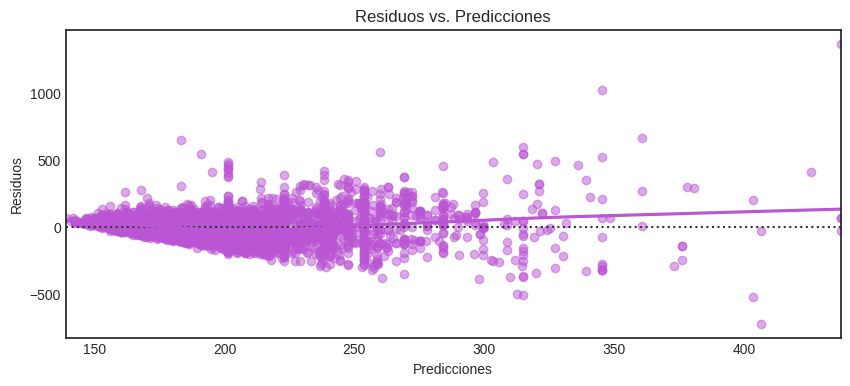

In [ ]:
y_pred = pred_train_elastic

# Calcula los residuos
residuos = y_train - y_pred

# Crea el residplot
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.residplot(x=y_pred, y=residuos, lowess=True, color='MediumOrchid', ax=ax, scatter_kws={'alpha': 0.5})
ax.set_xlabel('Predicciones')
ax.set_ylabel('Residuos')
ax.set_title('Residuos vs. Predicciones')
plt.show()

In [ ]:
predictions_Elastic = pred_test_elastic
predictions_train_Elastic = pred_train_elastic

# Si hay predicciones negativas, las igualamos a 0
for i,num in enumerate(predictions_Elastic):
    if num<0:
        predictions_Elastic[i] = 0

print('MAE-test:', metrics.mean_absolute_error(y_test, predictions_Elastic))
print('MAE-train:', metrics.mean_absolute_error(y_train, predictions_train_Elastic))
print()
print('MSE-test:', metrics.mean_squared_error(y_test, predictions_Elastic))
print('MSE-train:', metrics.mean_squared_error(y_train, predictions_train_Elastic))
print()
print('RMSE-test:', np.sqrt(metrics.mean_squared_error(y_test, predictions_Elastic)))
print('RMSE-train:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train_Elastic)))
print()
#print('RMSLE-test:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions_Elastic)))
#print('RMSLE-train:', np.sqrt(metrics.mean_squared_log_error(y_train, predictions_train_Elastic)))

MAE-test: 97.34653508138129
MAE-train: 94.32314417984549

MSE-test: 23643.28384203146
MSE-train: 19973.869512969548

RMSE-test: 153.76372732875416
RMSE-train: 141.3289408188201



#### ***4.3 🎯 Modelo KNN - Nearest Neighbors***

Búsqueda de los mejores parámetros:

In [ ]:
parameter_space = {
    "n_neighbors": [9, 10, 11,50],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1,2,20,50,200]
}

clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3,
                   scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_scaled_train, y_scaled_train)
print("Mejores Parámetros:")
print(clf.best_params_)

Mejores Parámetros:
{'algorithm': 'kd_tree', 'leaf_size': 2, 'n_neighbors': 50, 'weights': 'distance'}


In [ ]:
knn_model = KNeighborsRegressor(**clf.best_params_)

Entrenamiento del modelo:

In [ ]:
knn_model.fit(X_scaled_train, y_scaled_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=2, n_neighbors=50,
                    weights='distance')

In [ ]:
## Un modelo alimentado con datos escalados devuelve predicciones también escaladas
pred_scaled_train = knn_model.predict(X_scaled_train)
pred_scaled_test  = knn_model.predict(X_scaled_test)

## Para evaluar las predicciones, debemos aplicar la transformación de escala
## inversa
pred_train_knn = scaler_y.inverse_transform(pred_scaled_train.reshape(-1, 1))
pred_test_knn  = scaler_y.inverse_transform(pred_scaled_test.reshape(-1, 1))

knn_mae = mean_absolute_error(y_test, pred_test_knn)
print("K-Nearest Neighbors MAE =", knn_mae)

K-Nearest Neighbors MAE = 57.17532283355529


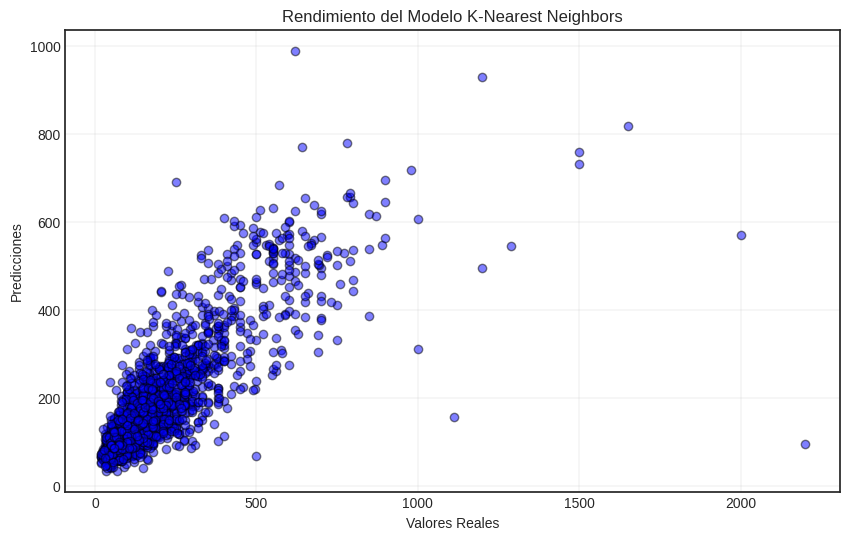

In [ ]:
# Dibuja el gráfico de dispersión para las predicciones de test vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=pred_test_knn, color='blue', alpha=0.5, edgecolors='k')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del Modelo K-Nearest Neighbors")
plt.grid(True)

# Muestra el gráfico
plt.show()

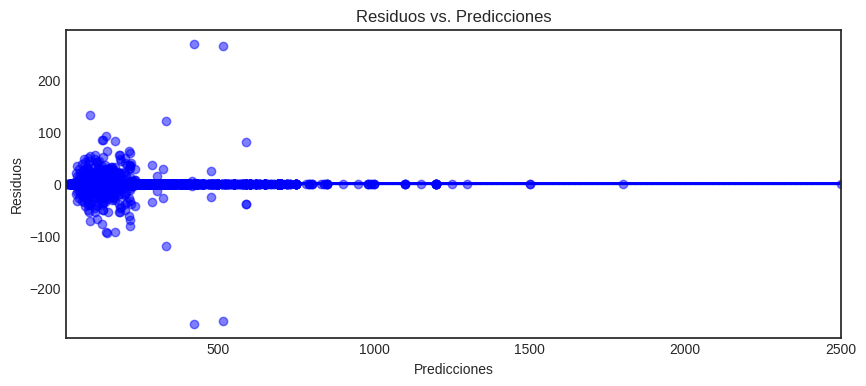

In [ ]:
y_pred = pred_train_knn

# Calcula los residuos
residuos = y_train - y_pred

# Crea el residplot
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.residplot(x=y_pred, y=residuos, lowess=True, color='blue', ax=ax, scatter_kws={'alpha': 0.5})
ax.set_xlabel('Predicciones')
ax.set_ylabel('Residuos')
ax.set_title('Residuos vs. Predicciones')
plt.show()

In [ ]:
predictions_Neighbors = pred_test_knn
predictions_train_Neighbors = pred_train_knn

# Si hay predicciones negativas, las igualamos a 0
for i,num in enumerate(predictions_Neighbors):
    if num<0:
        predictions_Neighbors[i] = 0

print('MAE-test:', metrics.mean_absolute_error(y_test, predictions_Neighbors))
print('MAE-train:', metrics.mean_absolute_error(y_train, predictions_train_Neighbors))
print()
print('MSE-test:', metrics.mean_squared_error(y_test, predictions_Neighbors))
print('MSE-train:', metrics.mean_squared_error(y_train, predictions_train_Neighbors))
print()
print('RMSE-test:', np.sqrt(metrics.mean_squared_error(y_test, predictions_Neighbors)))
print('RMSE-train:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train_Neighbors)))
print()
#print('RMSLE-test:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions_Neighbors)))
#print('RMSLE-train:', np.sqrt(metrics.mean_squared_log_error(y_train, predictions_train_Neighbors)))

MAE-test: 57.17532283355529
MAE-train: 1.9822551360962946

MSE-test: 11491.418886295913
MSE-train: 131.8495309886404

RMSE-test: 107.1980358322666
RMSE-train: 11.482575102677988



#### ***4.4 🎯 Modelo Tree Decision***

Primero, se obtendrán los mejores parámetros.

In [ ]:
parameter_space = \
    {
        "criterion": ["squared_error","friedman_mse","absolute_error"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(tree.DecisionTreeRegressor(random_state=3), parameter_space,
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_scaled_train, y_scaled_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'absolute_error', 'max_features': 20, 'min_samples_leaf': 25, 'min_samples_split': 5}


In [ ]:
dt_model = tree.DecisionTreeRegressor(random_state=3,**clf.best_params_)

Entrenamos un modelo de árbol de decisión para regresiones

In [ ]:
dt_model.fit(X_scaled_train, y_scaled_train)

DecisionTreeRegressor(criterion='absolute_error', max_features=20,
                      min_samples_leaf=25, min_samples_split=5, random_state=3)

In [ ]:
## Un modelo alimentado con datos escalados devuelve predicciones también escaladas
pred_scaled_train = dt_model.predict(X_scaled_train)
pred_scaled_test  = dt_model.predict(X_scaled_test)

## Para evaluar las predicciones, debemos aplicar la transformación de escala
## inversa
pred_train_dt = scaler_y.inverse_transform(pred_scaled_train.reshape(-1, 1))
pred_test_dt  = scaler_y.inverse_transform(pred_scaled_test.reshape(-1, 1))

dt_mae = mean_absolute_error(y_test, pred_test_dt)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 54.34062846889952


In [ ]:
mae_train = mean_absolute_error(y_train, pred_train_dt)
mae_test = mean_absolute_error(y_test, pred_test_dt)
mse_train = mean_squared_error(y_train, pred_train_dt)
mse_test = mean_squared_error(y_test, pred_test_dt)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train_dt))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test_dt))

print(f"MAE-train: {mae_train}")
print(f"MAE-test: {mae_test}")
print()
print(f"MSE-train: {mse_train}")
print(f"MSE-test: {mse_test}")
print()
print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

MAE-train: 46.89882109150595
MAE-test: 54.34062846889952

MSE-train: 6831.003893764465
MSE-test: 10548.140163394617

RMSE Train: 82.64988743951479
RMSE Test: 102.7041389788874


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


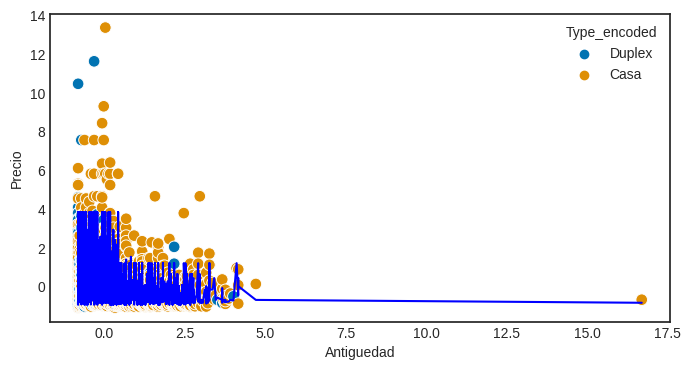

In [ ]:
X_y = X.copy()
X_y["target"] = y.values

scaler = StandardScaler()
# Tenemos que ajustar el escalador a nuestros datos antes de la transformación
X_y.loc[:, X_y.columns] = scaler.fit_transform(
    X_y.loc[:, X_y.columns])

sort_idx = X["Antiguedad"].argsort()
X_y = X_y.iloc[sort_idx,:]
pred = dt_model.predict(X_y[["m2cubierto", "Banos", "Dormitorios", "Antiguedad", "Cochera","Luminoso", "Suite", "Pileta","Patio","Oportunidad","Country","Exc_ubi", "Type_encoded"]])
X_y["Type_encoded"] = label_encoder.inverse_transform(data['Type_encoded'])


plt.figure(figsize=(8, 4))
sns.scatterplot(data = X_y, x ="Antiguedad" , y="target", hue="Type_encoded", s=70, palette="colorblind")
plt.plot(X_y["Antiguedad"], pred ,color='blue',label="Predicciones del modelo")
plt.xlabel('Antiguedad')
plt.ylabel('Precio')
plt.show()

#### ***4.5 🎯 Modelo Random Forest***

Búsqueda de los mejores parámetros.

In [ ]:
parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["squared_error", "friedman_mse"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3),
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error",
                         n_iter=6, random_state=3)

clf.fit(X_scaled_train, y_scaled_train)
print("Mejores Parámetros:")
print(clf.best_params_)

Mejores Parámetros:
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 13, 'max_depth': 254, 'criterion': 'friedman_mse', 'bootstrap': True}


In [ ]:
rf_model = RandomForestRegressor(random_state=3,**clf.best_params_)

In [ ]:
rf_model.fit(X_scaled_train, y_scaled_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=254, max_features=13,
                      min_samples_leaf=5, n_estimators=10, random_state=3)

In [ ]:
## Un modelo alimentado con datos escalados devuelve predicciones también escaladas
pred_scaled_train = rf_model.predict(X_scaled_train)
pred_scaled_test  = rf_model.predict(X_scaled_test)

## Para evaluar las predicciones, debemos aplicar la transformación de escala inversa
pred_train_rf = scaler_y.inverse_transform(pred_scaled_train.reshape(-1, 1))
pred_test_rf  = scaler_y.inverse_transform(pred_scaled_test.reshape(-1, 1))

rf_mae = mean_absolute_error(y_test, pred_test_rf)
print("Random Forest MAE =", rf_mae)

Random Forest MAE = 50.61712660764083


In [ ]:
predictions_rf = pred_test_rf
predictions_train_rf = pred_train_rf

# Si hay predicciones negativas, las igualamos a 0
for i,num in enumerate(predictions_rf):
    if num<0:
        predictions_rf[i] = 0

print('MAE-test:', metrics.mean_absolute_error(y_test, predictions_rf))
print('MAE-train:', metrics.mean_absolute_error(y_train, predictions_train_rf))
print()
print('MSE-test:', metrics.mean_squared_error(y_test, predictions_rf))
print('MSE-train:', metrics.mean_squared_error(y_train, predictions_train_rf))
print()
print('RMSE-test:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))
print('RMSE-train:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train_rf)))
print()
#print('RMSLE-test:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions_rf)))
#print('RMSLE-train:', np.sqrt(metrics.mean_squared_log_error(y_train, predictions_train_rf)))

MAE-test: 50.61712660764083
MAE-train: 39.55472105422087

MSE-test: 9217.708452096458
MSE-train: 4258.600865005655

RMSE-test: 96.0088977756565
RMSE-train: 65.25795633488421



#### ***4.6 🎯 Modelo de Redes Neuronales***

Regresión con Perceptrón Multicapa

Por lo general, las redes neuronales son sensibles ante los cambios de escala (o de unidades). Por eso, suele ser conveniente escalar los datos antes de entrenar el modelo.

In [ ]:
hidden_layer_sizes=(100)

mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation="tanh", solver="adam", learning_rate="constant", max_iter = 1000,random_state=3)
mlp.fit(X_scaled_train, y_scaled_train)

## Un modelo alimentado con datos escalados devuelve predicciones también escaladas
pred_scaled_train = mlp.predict(X_scaled_train)
pred_scaled_test  = mlp.predict(X_scaled_test)

## Para evaluar las predicciones, debemos aplicar la transformación de escala inversa
pred_train = scaler_y.inverse_transform(pred_scaled_train.reshape(-1, 1))
pred_test  = scaler_y.inverse_transform(pred_scaled_test.reshape(-1, 1))

In [ ]:
print(f"Numero de iteraciones: {mlp.n_iter_}")
print(f"Train score: {mlp.score(X_scaled_train,y_scaled_train)}")
print(f"Test score: {mlp.score(X_scaled_test,y_scaled_test)}")

Numero de iteraciones: 179
Train score: 0.8110202895966716
Test score: 0.6980862733466064


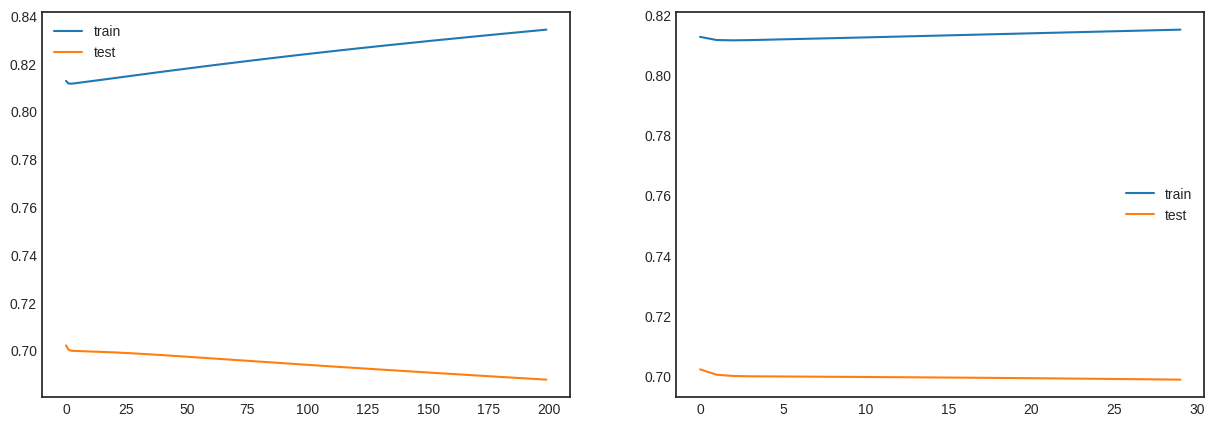

In [ ]:
epochs = np.arange(200)
train_scores = np.zeros_like(epochs,dtype=float)
test_scores = np.zeros_like(epochs,dtype=float)

for i in epochs:
    mlp.partial_fit(X_scaled_train,y_scaled_train)

    train_scores[i] = mlp.score(X_scaled_train,y_scaled_train)
    test_scores[i] = mlp.score(X_scaled_test,y_scaled_test)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs,train_scores,label='train')
plt.plot(epochs,test_scores,label='test')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs[:30],train_scores[:30],label='train')
plt.plot(epochs[:30],test_scores[:30],label='test')
plt.legend()

Train RMSE = 73
Test  RMSE = 99


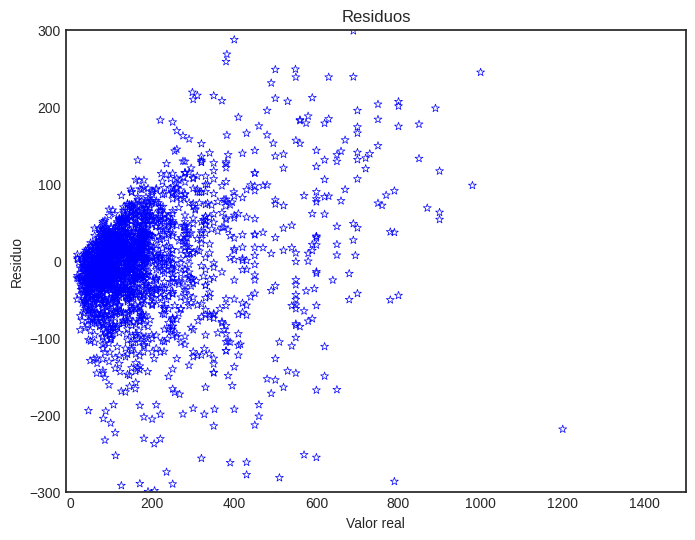

In [ ]:
print("Train RMSE = {:.0f}".format(np.sqrt(mean_squared_error(pred_train, y_train))))
print("Test  RMSE = {:.0f}".format(np.sqrt(mean_squared_error(pred_test, y_test))))

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test.values, y_test.values - pred_test, marker = "*", edgecolors="blue", facecolors="none", linewidth=.5, label="Perceptrón")
ax.set_ylim(-300, 300)
ax.set_xlim(-10, 1500)
ax.set_title("Residuos")
ax.set_xlabel("Valor real")
ax.set_ylabel("Residuo")
plt.show()

Se utiliza la raiz cuadrada del error cuadrático medio como medida del error

In [ ]:
def rmse(y1, y2):
    """
    Raiz cuadrada del error cuadrático medio.
    """
    return np.sqrt(mean_squared_error(y1, y2))

In [ ]:
## Cantidad de épocas
n_epochs = 200
epochs = range(1, n_epochs+1)

## Listas donde almacenaremos las métricas de error
train_rmse_values = []
test_rmse_values = []

## Diccionario de hiperparámetros del modelo
hyperparams = dict(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='tanh',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    alpha=0.0001
)
#
model = MLPRegressor(
    random_state=3,
    max_iter=1000,
    warm_start=True,
    **hyperparams
)

def get_number_of_params(model):
    """
    Devuelve el número de parámetros de un modelo de tipo
    Multi-Layer Perceptron
    """
    return sum(
        [layer_coefs.size for layer_coefs in model.coefs_] +
        [layer_bias.size for layer_bias in model.intercepts_]
    )

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

import itertools
from tqdm.notebook import tqdm

In [ ]:
for epoch in tqdm(range(n_epochs)):
    ## Fiteo del modelo
    model.fit(X_scaled_train, y_scaled_train)
    params = mlp.get_params()

    ## Predicciones sobre conjunto de entrenamiento y evaluación
    pred_train = scaler_y.inverse_transform(model.predict(X_scaled_train).reshape(-1, 1))
    pred_test  = scaler_y.inverse_transform(model.predict(X_scaled_test).reshape(-1, 1))

    ## Calculamos el error en los conjuntos de entrenamiento y evaluación
    train_rmse_values.append(rmse(pred_train, y_train))
    test_rmse_values.append(rmse(pred_test, y_test))

epochs = range(1, len(train_rmse_values)+1)
print('Cantidad de parámetros:', get_number_of_params(model))
print('Cantidad de muestras de entrenamiento:', X_scaled_train.shape[0])

  0%|          | 0/200 [00:00<?, ?it/s]

Cantidad de parámetros: 1501
Cantidad de muestras de entrenamiento: 4874


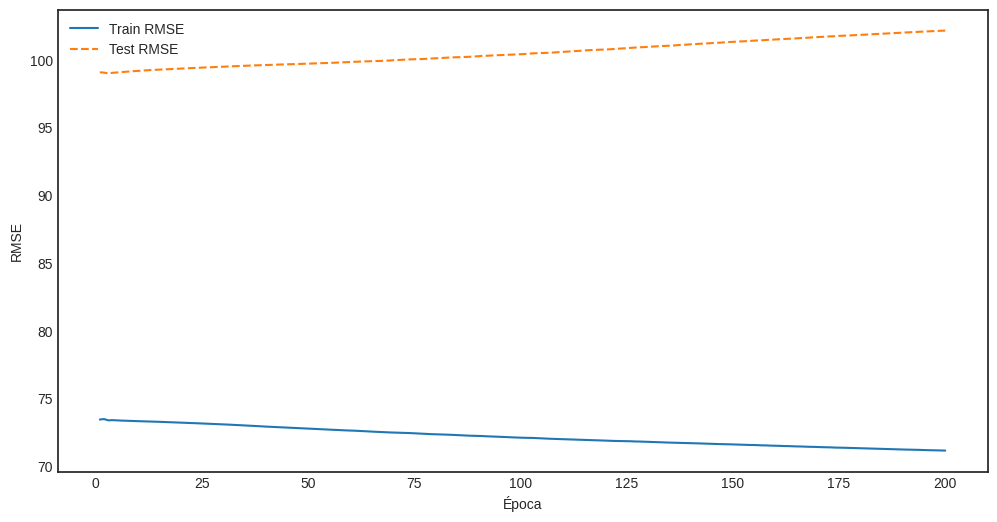

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Época')
ax.set_ylabel('RMSE')
ax.plot(epochs, train_rmse_values, label='Train RMSE')
ax.plot(epochs, test_rmse_values, linestyle='--', label='Test RMSE')
ax.legend()
plt.show()

##### *4.6.1 Hiperparámetros learning_rate_init*

In [ ]:
n_epochs = 250
epochs = range(1, n_epochs+1)

learning_rate_init_values = [
    0.00001, 0.0001, 0.001, 0.01
]

metrics = {}

for learning_rate_init in tqdm(learning_rate_init_values):
    hyperparams = dict(
        activation="tanh",
        solver='adam',
        learning_rate="constant",
        alpha=0.0001,
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate_init=learning_rate_init,
    )
    model = MLPRegressor(
        random_state=3,
        max_iter=1000,
        warm_start=True,
        **hyperparams
    )

    train_rmse_values = []
    test_rmse_values = []

    for epoch in tqdm(epochs, leave=False):
        ## Fiteo del model
        model.fit(X_scaled_train, y_scaled_train)

        ## Predicciones sobre conjunto de entrenamiento y validacion
        pred_train = scaler_y.inverse_transform(model.predict(X_scaled_train).reshape(-1, 1))
        pred_test  = scaler_y.inverse_transform(model.predict(X_scaled_test).reshape(-1, 1))

        ## Cálculo de métricas
        train_rmse_values.append(rmse(pred_train, y_train))
        test_rmse_values.append(rmse(pred_test, y_test))

    metrics[learning_rate_init] = pd.DataFrame({
        'train_rmse': train_rmse_values,
        'test_rmse': test_rmse_values
    })

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

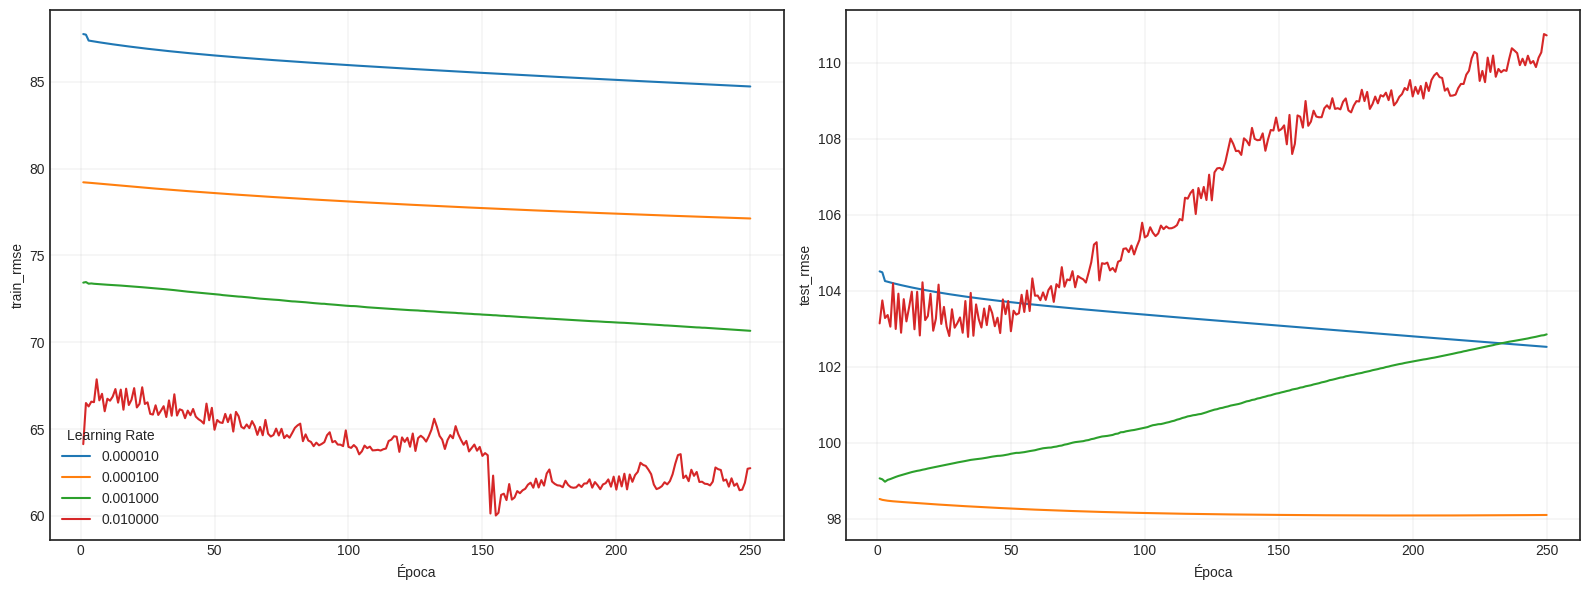

In [ ]:
fig, axes = plt.subplots(figsize=(16, 6), ncols=2,sharex=True)

for hyperparm_value, hyperparm_metrics in metrics.items():
    for j, (metric_name, metric_values) in enumerate(hyperparm_metrics.items()):
        ax = axes[j]
        ax.set_ylabel(metric_name)
        x_plot = epochs
        y_plot = metric_values
        ax.plot(x_plot, y_plot, label=f'{hyperparm_value:f}')

for ax in axes:
    ax.set_xlabel('Época')
    ax.grid(True)

legend = axes[0].legend()
legend.set_title('Learning Rate')

for ax in axes:
    pass
    #ax.set_ylim(0, 260)
    ax.grid(True)

plt.tight_layout()
plt.show()

De aquí parece que el mejor learning rate se encuentra en el orden de '0.0001'. Probemos ahora tomando ese valor y cambiando la función de activación. Además parece que podemos quedarnos con las primeras 150 épocas (o incluso menos) sin perder rendimiento respecto al error pero evitando más cálculos.

##### *4.6.2 Hiperparámetros activation*

In [ ]:
n_epochs = 150
epochs = range(1, n_epochs+1)

activation_functions = [
    'identity','logistic','tanh','relu'
]

metrics = {}

for activation in tqdm(activation_functions):
    hyperparams = dict(
        solver='adam',
        alpha=0.0001,
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate_init=0.0001,
        activation=activation
    )
    model = MLPRegressor(
        random_state=3,
        max_iter=1000,
        warm_start=True,
        **hyperparams
    )

    train_rmse_values = []
    test_rmse_values = []

    for epoch in tqdm(epochs, leave=False):
        ## Fiteo del model
        model.fit(X_scaled_train, y_scaled_train)

        ## Predicciones sobre conjunto de entrenamiento y validacion
        pred_train = scaler_y.inverse_transform(model.predict(X_scaled_train).reshape(-1, 1))
        pred_test  = scaler_y.inverse_transform(model.predict(X_scaled_test).reshape(-1, 1))

        ## Cálculo de métricas
        train_rmse_values.append(rmse(pred_train, y_train))
        test_rmse_values.append(rmse(pred_test, y_test))

    metrics[activation] = pd.DataFrame({
        'train_rmse': train_rmse_values,
        'test_rmse': test_rmse_values
    })

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

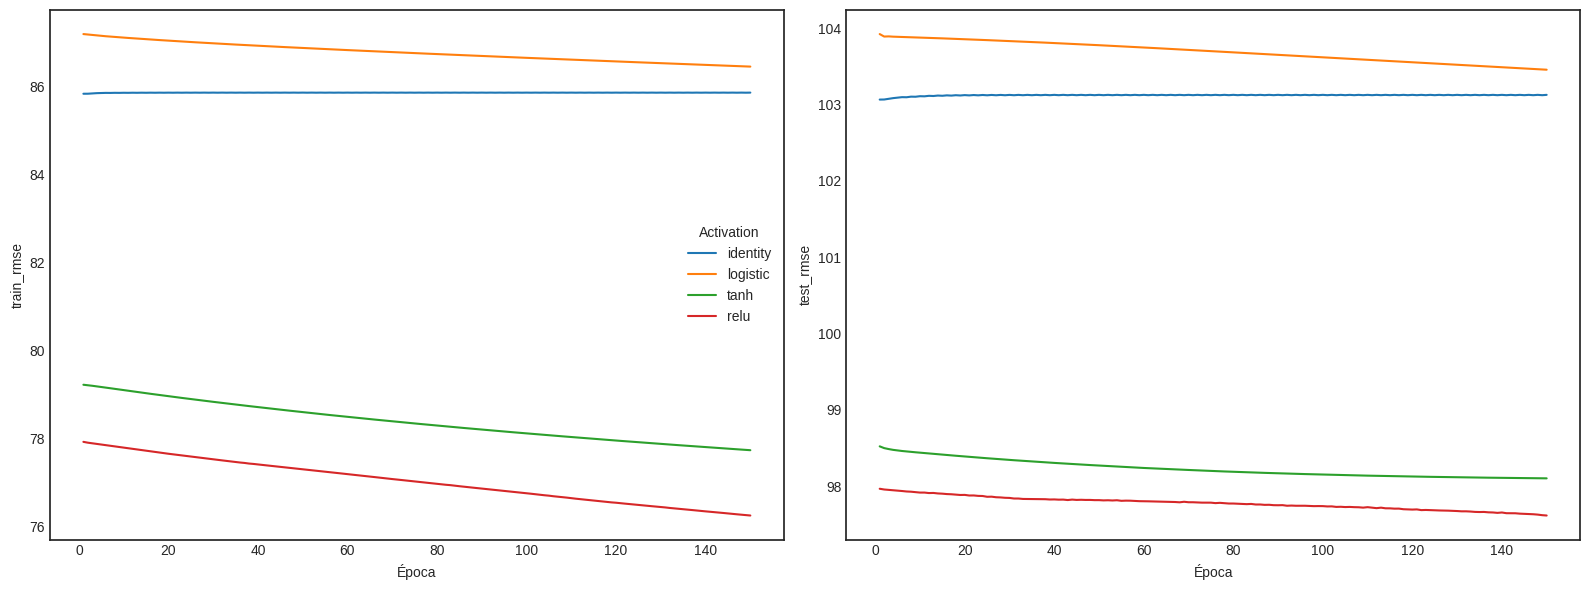

In [ ]:
fig, axes = plt.subplots(figsize=(16, 6), ncols=2)

for hyperparm_value, hyperparm_metrics in metrics.items():
    for j, (metric_name, metric_values) in enumerate(hyperparm_metrics.items()):
        ax = axes[j]
        ax.set_ylabel(metric_name)
        x_plot = epochs
        y_plot = metric_values
        ax.plot(x_plot, y_plot, label=hyperparm_value)

for ax in axes:
    ax.set_xlabel('Época')

legend = axes[0].legend()
legend.set_title('Activation')


plt.tight_layout()
plt.show()

Nos quedamos con las funciones de activación relu y tanh por el resultado del RMSE en el conjunto test.

##### *4.6.3 Evalución de rendimiento*

In [ ]:
n_epochs = 150
epochs = range(1, n_epochs+1)

solver_algorithms = [
    'adam','lbfgs'
]

activation_function = [
    'relu','tanh'
]

params_sets = list(itertools.product(solver_algorithms, activation_function))

metrics = {}

for params in tqdm(params_sets):
    hyperparams = dict(
        solver=params[0],
        alpha=0.0001,
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate_init=0.0001,
        activation=params[1]
    )
    model = MLPRegressor(
        random_state=3,
        max_iter=1000,
        warm_start=True,
        **hyperparams
    )

    train_rmse_values = []
    test_rmse_values = []

    for epoch in tqdm(epochs, leave=False):
        ## Fiteo del model
        model.fit(X_scaled_train, y_scaled_train)

        ## Predicciones sobre conjunto de entrenamiento y validacion
        pred_train = scaler_y.inverse_transform(model.predict(X_scaled_train).reshape(-1, 1))
        pred_test  = scaler_y.inverse_transform(model.predict(X_scaled_test).reshape(-1, 1))

        ## Cálculo de métricas
        train_rmse_values.append(rmse(pred_train, y_train))
        test_rmse_values.append(rmse(pred_test, y_test))

    metrics[params] = pd.DataFrame({
        'train_rmse': train_rmse_values,
        'test_rmse': test_rmse_values
    })

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

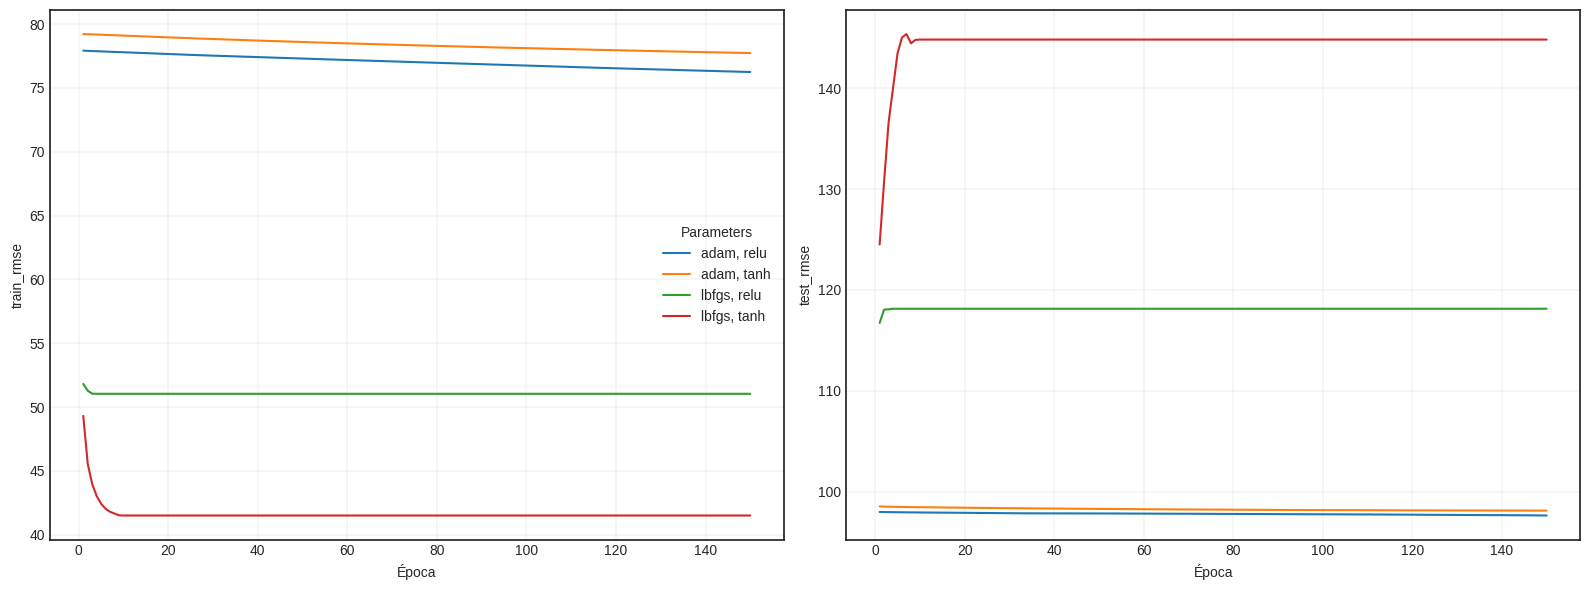

In [ ]:
fig, axes = plt.subplots(figsize=(16, 6), ncols=2)

for hyperparm_value, hyperparm_metrics in metrics.items():
    for j, (metric_name, metric_values) in enumerate(hyperparm_metrics.items()):
        ax = axes[j]
        ax.set_ylabel(metric_name)
        x_plot = epochs
        y_plot = metric_values
        ax.plot(x_plot, y_plot, label=hyperparm_value[0]+', '+hyperparm_value[1])

for ax in axes:
    ax.set_xlabel('Época')

legend = axes[0].legend()
legend.set_title('Parameters')

for ax in axes:
    pass
    #ax.set_ylim(105, 200)
    ax.grid(True)

plt.tight_layout()
plt.show()

Podríamos considerar que la mejor opción es "adam,relu".

##### *4.6.4 Evaluación de alpha*

In [ ]:
n_epochs = 250
epochs = range(1, n_epochs+1)

alpha_values = [
    0.0001, 0.001, 0.01, 1, 10
]

metrics = {}

for alpha in tqdm(alpha_values):
    hyperparams = dict(
        activation="relu",
        solver='adam',
        learning_rate="constant",
        alpha=alpha,
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate_init=0.0001,
    )
    model = MLPRegressor(
        random_state=3,
        max_iter=1000,
        warm_start=True,
        **hyperparams
    )

    train_rmse_values = []
    test_rmse_values = []

    for epoch in tqdm(epochs, leave=False):
        ## Fiteo del model
        model.fit(X_scaled_train, y_scaled_train)

        ## Predicciones sobre conjunto de entrenamiento y validacion
        pred_train = scaler_y.inverse_transform(model.predict(X_scaled_train).reshape(-1, 1))
        pred_test  = scaler_y.inverse_transform(model.predict(X_scaled_test).reshape(-1, 1))

        ## Cálculo de métricas
        train_rmse_values.append(rmse(pred_train, y_train))
        test_rmse_values.append(rmse(pred_test, y_test))

    metrics[alpha] = pd.DataFrame({
        'train_rmse': train_rmse_values,
        'test_rmse': test_rmse_values
    })

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

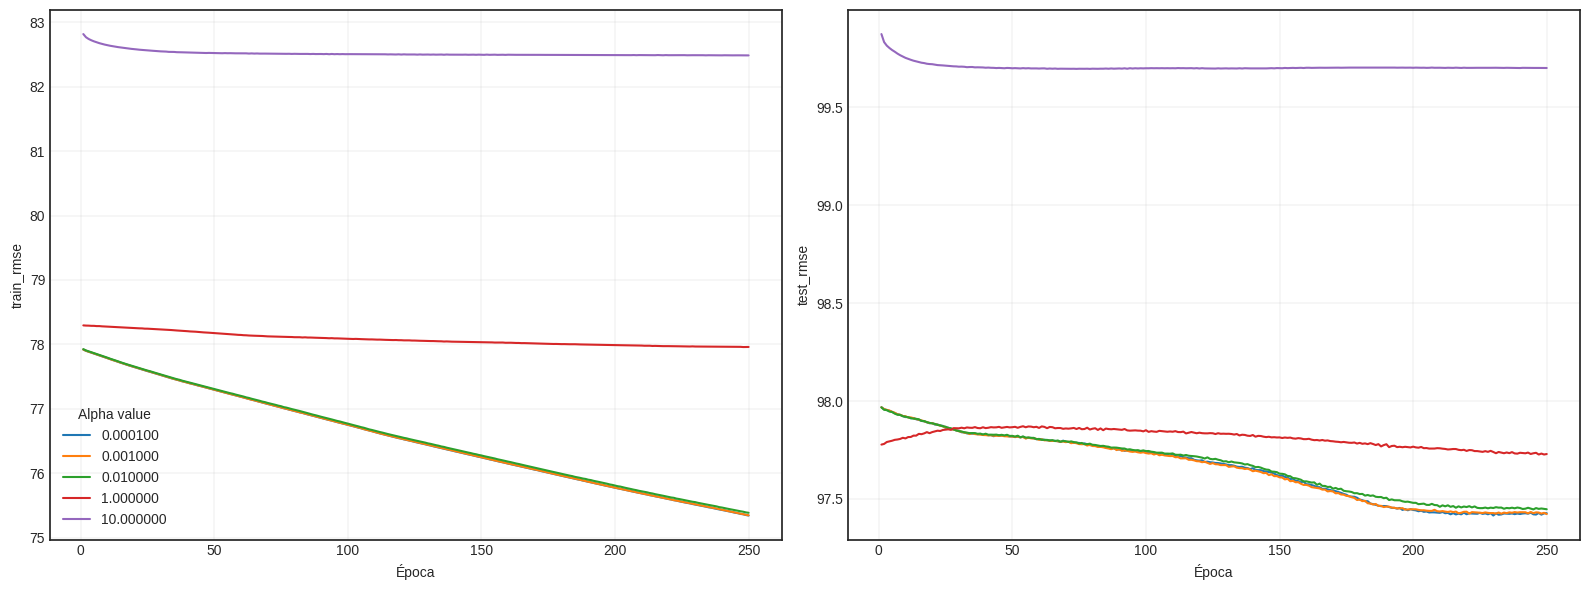

In [ ]:
fig, axes = plt.subplots(figsize=(16, 6), ncols=2,sharex=True)

for hyperparm_value, hyperparm_metrics in metrics.items():
    for j, (metric_name, metric_values) in enumerate(hyperparm_metrics.items()):
        ax = axes[j]
        ax.set_ylabel(metric_name)
        x_plot = epochs
        y_plot = metric_values
        ax.plot(x_plot, y_plot, label=f'{hyperparm_value:f}')

for ax in axes:
    ax.set_xlabel('Época')
    ax.grid(True)

legend = axes[0].legend()
legend.set_title('Alpha value')

for ax in axes:
    pass
    #ax.set_ylim(72, 75)
    ax.grid(True)

plt.tight_layout()
plt.show()

Aquí podemos observar que el mejor valor de alpha que podemos utilizar es 0.001

##### *4.6.5 Evaluación de capas ocultas*

Probaremos ahora algunas opciones para las capas ocultas
Estas opciones fueron elegidas aleatoriamente y en base a la lectura de otros proyectos similares realizados y observados en la plataforma Kaggle.

In [ ]:
n_epochs = 250
epochs = range(1, n_epochs+1)

hidden_layer_values = [
    (100), (90), (80,60), (100,80), (120)
]

metrics = {}

for hidden_layer_sizes in tqdm(hidden_layer_values):
    hyperparams = dict(
        activation="relu",
        solver='adam',
        learning_rate="constant",
        alpha=0.001,
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate_init=0.0001,
    )
    model = MLPRegressor(
        random_state=3,
        max_iter=1000,
        warm_start=True,
        **hyperparams
    )

    train_rmse_values = []
    test_rmse_values = []

    for epoch in tqdm(epochs, leave=False):
        ## Fiteo del model
        model.fit(X_scaled_train, y_scaled_train)

        ## Predicciones sobre conjunto de entrenamiento y validacion
        pred_train = scaler_y.inverse_transform(model.predict(X_scaled_train).reshape(-1, 1))
        pred_test  = scaler_y.inverse_transform(model.predict(X_scaled_test).reshape(-1, 1))

        ## Cálculo de métricas
        train_rmse_values.append(rmse(pred_train, y_train))
        test_rmse_values.append(rmse(pred_test, y_test))

    metrics[hidden_layer_sizes] = pd.DataFrame({
        'train_rmse': train_rmse_values,
        'test_rmse': test_rmse_values
    })

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

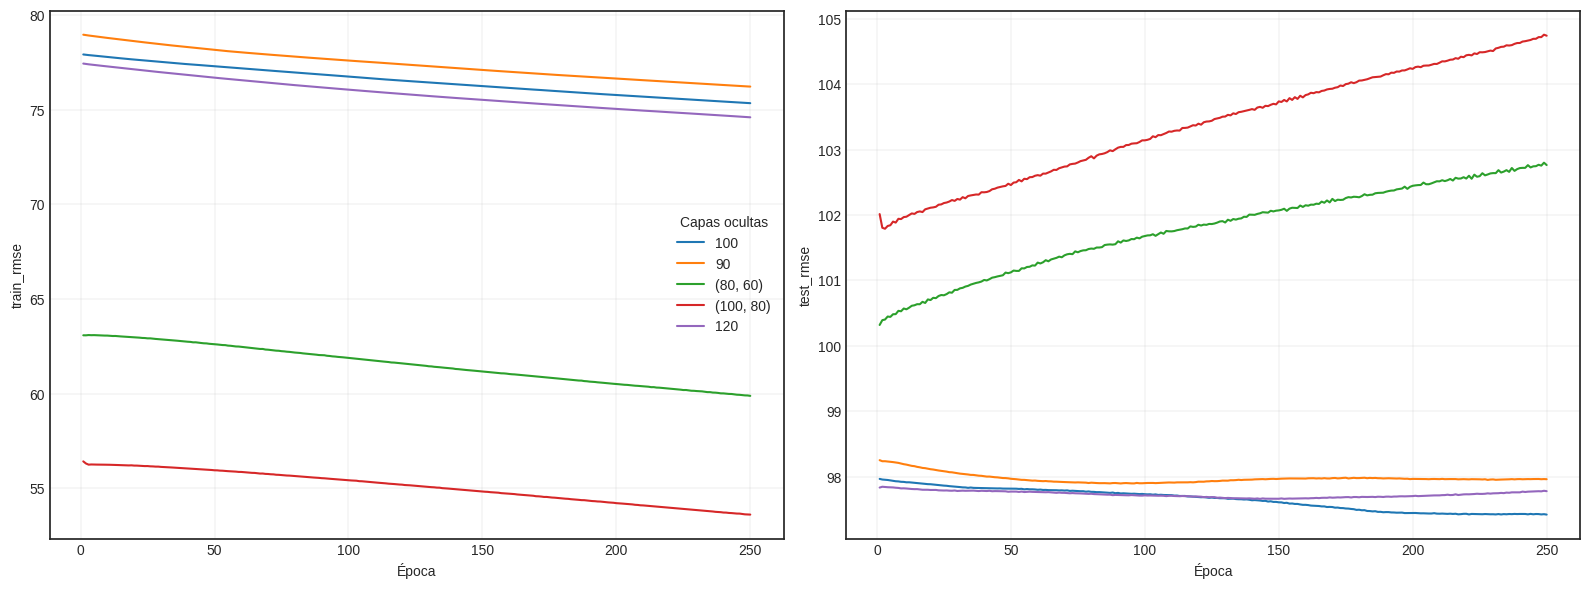

In [ ]:
fig, axes = plt.subplots(figsize=(16, 6), ncols=2, sharex=True)

for hyperparm_value, hyperparm_metrics in metrics.items():
    for j, (metric_name, metric_values) in enumerate(hyperparm_metrics.items()):
        ax = axes[j]
        ax.set_ylabel(metric_name)
        x_plot = epochs
        y_plot = metric_values
        ax.plot(x_plot, y_plot, label=f'{str(hyperparm_value)}')

for ax in axes:
    ax.set_xlabel('Época')
    ax.grid(True)

legend = axes[0].legend()
legend.set_title('Capas ocultas')

for ax in axes:
    pass
    ax.grid(True)

plt.tight_layout()
plt.show()

Luego de varias prueba, concluimos que mantener el valor de las capas ocultas en 100, es la mejor opción

##### *4.6.6 Aplicación de Hiperparámetros*

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=100, activation="relu", solver="adam", learning_rate="constant",learning_rate_init=0.0001, alpha=0.001,
                   max_iter = 250, random_state=3)
mlp.fit(X_scaled_train, y_scaled_train)

## Un modelo alimentado con datos escalados devuelve predicciones también
## escaladas
pred_scaled_train = mlp.predict(X_scaled_train)
pred_scaled_test  = mlp.predict(X_scaled_test)

## Para evaluar las predicciones, debemos aplicar la transformación de escala
## inversa
pred_train_RN = scaler_y.inverse_transform(pred_scaled_train.reshape(-1, 1))
pred_test_RN  = scaler_y.inverse_transform(pred_scaled_test.reshape(-1, 1))

In [ ]:
print(f"Numero de iteraciones: {mlp.n_iter_}")
print(f"Train score: {mlp.score(X_scaled_train,y_scaled_train)}")
print(f"Test score: {mlp.score(X_scaled_test,y_scaled_test)}")

Numero de iteraciones: 176
Train score: 0.7872477732641606
Test score: 0.7047423540683012


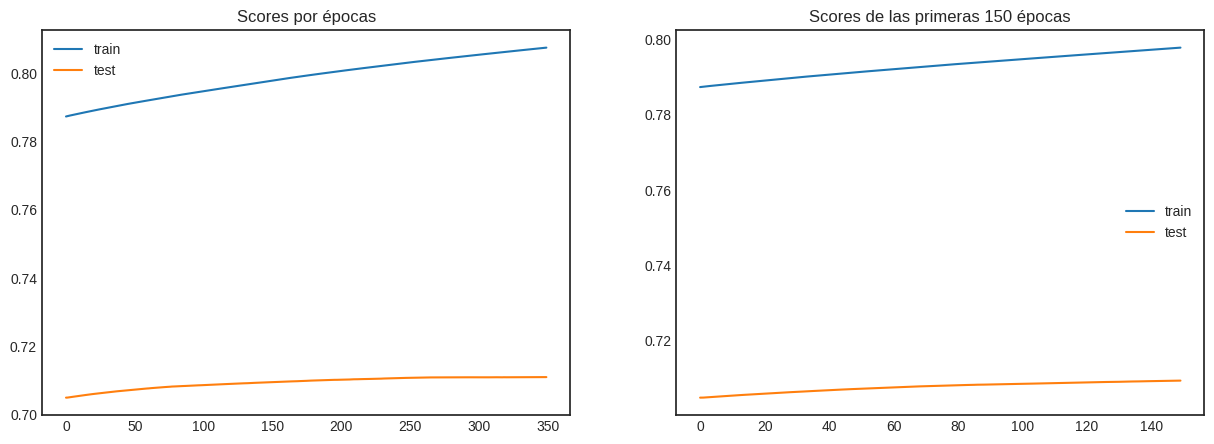

In [ ]:
epochs = np.arange(350)
train_scores = np.zeros_like(epochs,dtype=float)
test_scores = np.zeros_like(epochs,dtype=float)

for i in epochs:
    mlp.partial_fit(X_scaled_train,y_scaled_train)

    train_scores[i] = mlp.score(X_scaled_train,y_scaled_train)
    test_scores[i] = mlp.score(X_scaled_test,y_scaled_test)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs,train_scores,label='train')
plt.plot(epochs,test_scores,label='test')
plt.title('Scores por épocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs[:150],train_scores[:150],label='train')
plt.plot(epochs[:150],test_scores[:150],label='test')
plt.title('Scores de las primeras 150 épocas')
plt.legend()

Train RMSE = 75
Test  RMSE = 98


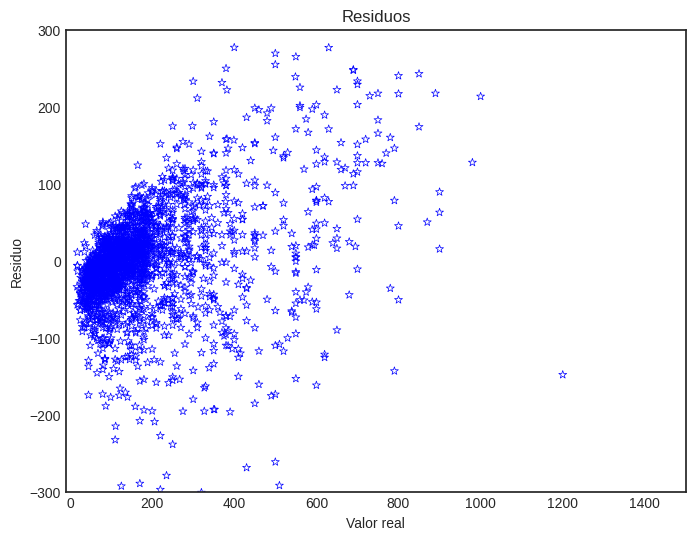

In [ ]:
print("Train RMSE = {:.0f}".format(np.sqrt(mean_squared_error(pred_train, y_train))))
print("Test  RMSE = {:.0f}".format(np.sqrt(mean_squared_error(pred_test, y_test))))

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test.values, y_test.values - pred_test_RN, marker = "*", edgecolors="blue", facecolors="none", linewidth=.5, label="Perceptrón")
ax.set_ylim(-300, 300)
ax.set_xlim(-10, 1500)
ax.set_title("Residuos")
ax.set_xlabel("Valor real")
ax.set_ylabel("Residuo")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calcula MSE, MAE y RMSE para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, pred_train_RN)
mae_train = mean_absolute_error(y_train, pred_train_RN)
rmse_train = np.sqrt(mse_train)

# Calcula MSE, MAE y RMSE para el conjunto de prueba
mse_test = mean_squared_error(y_test, pred_test_RN)
mae_test = mean_absolute_error(y_test, pred_test_RN)
rmse_test = np.sqrt(mse_test)

# Imprime los resultados
print("Conjunto de Entrenamiento:")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")

print("\nConjunto de Prueba:")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

Conjunto de Entrenamiento:
MSE: 6071.2680
MAE: 48.7253
RMSE: 77.9183

Conjunto de Prueba:
MSE: 9597.7643
MAE: 53.0544
RMSE: 97.9682


#### ***4.7 ❗ Análisis y Comparación de Modelos***

En la sección anterior, se crearon muchos modelos, y para cada modelo, se buscaron los mejores parámetros.
Se construyeron los modelos utilizando esos parámetros. Se entrenaron (**ajustaron**) los modelos a nuestros datos de entrenamiento (**X_train** e **y_train**), además, se probaron los modelos en los datos de prueba (**X_test**).

Por último, se evaluó el rendimiento del modelo comparando las predicciones del modelo con los valores verdaderos en **y_test**.

A partir de los resultados obtenidos en la sección anterior, se presenta una tabla que muestra las evaluaciones de cada modelo cuando se aplica al conjunto de pruebas **X_test**.

In [ ]:
valor_mae_ridge = mean_absolute_error(y_test, predictions_ridge)
valor_mse_ridge = mean_squared_error(y_test, predictions_ridge)
valor_rmse_ridge = np.sqrt(valor_mse_ridge)

# Modelo de regresión múltiple - Elastic Net:
valor_mae_elastic = mean_absolute_error(y_test, predictions_Elastic)
valor_mse_elastic = mean_squared_error(y_test, predictions_Elastic)
valor_rmse_elastic = np.sqrt(valor_mse_elastic)

# Modelo Nearest Neighbors:
valor_mae_neighbors = mean_absolute_error(y_test, predictions_Neighbors)
valor_mse_neighbors = mean_squared_error(y_test, predictions_Neighbors)
valor_rmse_neighbors = np.sqrt(valor_mse_neighbors)

# Modelos de Árboles de decisión para problemas de regresión:
valor_mae_arboles = mean_absolute_error(y_test, pred_test_dt)
valor_mse_arboles = mean_squared_error(y_test, pred_test_dt)
valor_rmse_arboles = np.sqrt(valor_mse_arboles)

# Modelo Random Forest:
valor_mae_random_forest = mean_absolute_error(y_test, predictions_rf)
valor_mse_random_forest = mean_squared_error(y_test, predictions_rf)
valor_rmse_random_forest = np.sqrt(valor_mse_random_forest)

# Modelo de Redes Neuronales:
valor_mae_neuronales = mean_absolute_error(y_test, pred_test_RN)
valor_mse_neuronales = mean_squared_error(y_test, pred_test_RN)
valor_rmse_neuronales = np.sqrt(valor_mse_neuronales)

# Crea un DataFrame con los datos
data = {
    'Modelo': ['Ridge Regression', 'Elastic Net', 'Nearest Neighbors', 'Árboles de Decisión', 'Random Forest', 'Redes Neuronales'],
    'MAE-Test': [valor_mae_ridge, valor_mae_elastic, valor_mae_neighbors, valor_mae_arboles, valor_mae_random_forest, valor_mae_neuronales],
    'MSE-Test': [valor_mse_ridge, valor_mse_elastic, valor_mse_neighbors, valor_mse_arboles, valor_mse_random_forest, valor_mse_neuronales],
    'RMSE-Test': [valor_rmse_ridge, valor_rmse_elastic, valor_rmse_neighbors, valor_rmse_arboles, valor_rmse_random_forest, valor_rmse_neuronales]
}

df = pd.DataFrame(data)

# Muestra el DataFrame como tabla
df


,Modelo,MAE-Test,MSE-Test,RMSE-Test
0,Ridge Regression,57.721035,10593.832225,102.926344
1,Elastic Net,97.346535,23643.283842,153.763727
2,Nearest Neighbors,57.175323,11491.418886,107.198036
3,Árboles de Decisión,54.340628,10548.140163,102.704139
4,Random Forest,50.617127,9217.708452,96.008898
5,Redes Neuronales,53.054432,9597.764345,97.968180


##### 4.7.1 *Elección del mejor modelo / Consideraciones de Métricas de Rendimiento*

A la hora de seleccionar el modelo óptimo entre varias opciones evaluadas, es esencial basarnos en métricas de rendimiento adecuadas. Entre las métricas clave se encuentran:

*   **MAE (Error Absoluto Medio)**: Optar por un modelo con un MAE más bajo si buscamos robustez frente a valores atípicos y deseamos conocer la desviación promedio en las predicciones.

*   **MSE (Error Cuadrático Medio)**: Si estamos interesados en penalizar errores más grandes y estar dispuestos a darles más peso, considera el MSE. Sin embargo, esta métrica es sensible a valores atípicos.

*   **RMSE (Raíz del Error Cuadrático Medio)**: Similar al MSE pero más fácil de interpretar en términos prácticos, ya que mide la desviación en la misma unidad que la variable objetivo.

Es por eso que a partir de lo expuesto creemos conveniente elegir aquel modelo que presente el menor MAE.

In [ ]:
# Ordenar el DataFrame por la columna MAE-Test en orden ascendente
df_sorted = df.sort_values(by='MAE-Test')

df_sorted

,Modelo,MAE-Test,MSE-Test,RMSE-Test
4,Random Forest,50.617127,9217.708452,96.008898
5,Redes Neuronales,53.054432,9597.764345,97.968180
3,Árboles de Decisión,54.340628,10548.140163,102.704139
2,Nearest Neighbors,57.175323,11491.418886,107.198036
0,Ridge Regression,57.721035,10593.832225,102.926344
1,Elastic Net,97.346535,23643.283842,153.763727


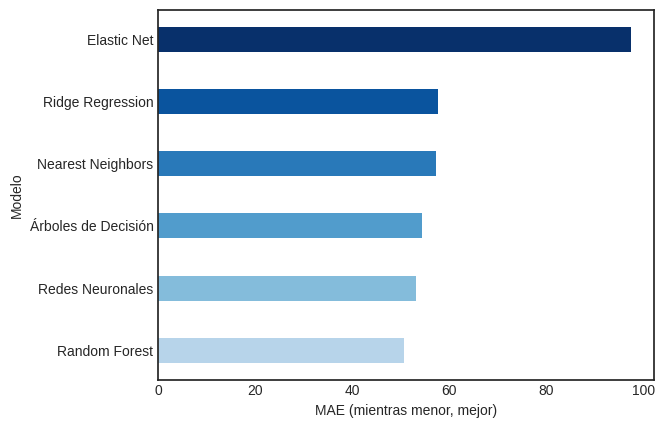

In [ ]:
modelos = df_sorted['Modelo']
valores_MAE = df_sorted['MAE-Test']

# Crear una escala de colores azules basada en los valores de MAE-Test
colores = plt.cm.Blues(np.linspace(0.3, 1, len(modelos)))

fig, ax = plt.subplots()
barh = ax.barh(y=range(len(modelos)), tick_label=modelos, width=valores_MAE, height=0.4, color=colores)

ax.set(xlabel="MAE (mientras menor, mejor)", ylabel="Modelo")
plt.show()

In [ ]:
mejor_modelo = df_sorted.iloc[0]
segundo_mejor_modelo = df_sorted.iloc[1]
peor_modelo = df_sorted.iloc[-1]

nombre_mejor_modelo = mejor_modelo['Modelo']
nombre_segundo_mejor_modelo = segundo_mejor_modelo['Modelo']
nombre_peor_modelo = peor_modelo['Modelo']

print(f"Analizando el gráfico y la tabla con las métricas de los distintos modelos, observamos que el {nombre_mejor_modelo} es el que presenta el menor MAE: {mejor_modelo['MAE-Test']:.4f}")
print(f"El segundo modelo con menor MAE es el {nombre_segundo_mejor_modelo} ({segundo_mejor_modelo['MAE-Test']:.4f})")
print(f"El {nombre_peor_modelo} presenta el peor MAE: {peor_modelo['MAE-Test']:.4f}")

Analizando el gráfico y la tabla con las métricas de los distintos modelos, observamos que el Random Forest es el que presenta el menor MAE: 50.6171
El segundo modelo con menor MAE es el Redes Neuronales (53.0544)
El Elastic Net presenta el peor MAE: 97.3465


##### 4.7.2 *Contexto de la interpretación del Performance*

Elegimos el error medio absoluto (MAE) como métrica de rendimiento para evaluar y comparar modelos. El MAE presenta un valor fácil de entender; muestra el valor medio del error del modelo. Por ejemplo, para nuestro modelo Random Forest, su MAE es de 50.6171, lo que significa que, de media, Random Forest predecirá un valor mayor o menor que el valor real en 50.6171 miles de Dólares (50,617.1 USD). Ahora, para entender lo bueno que es este MAE, necesitamos conocer el rango y la distribución de los datos. En nuestro caso, necesitamos ver los valores de la variable objetivo Precio, que contiene los precios reales de publicación de las viviendas.

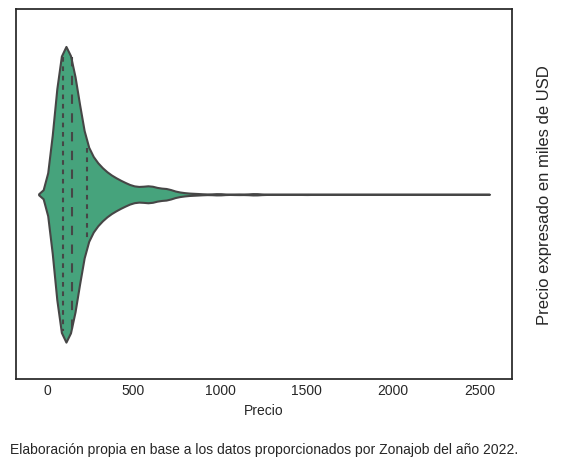

In [ ]:
sns.violinplot(x=data1['Precio'], inner="quartile", color="#36B37E")

plt.text(1.05, 0.5, "Precio expresado en miles de USD", transform=plt.gca().transAxes, fontsize=12, rotation=90, va='center')
plt.text(.5, -0.2, "Elaboración propia en base a los datos proporcionados por Zonajob del año 2022.", transform=plt.gca().transAxes, fontsize=10, ha='center')

plt.show()

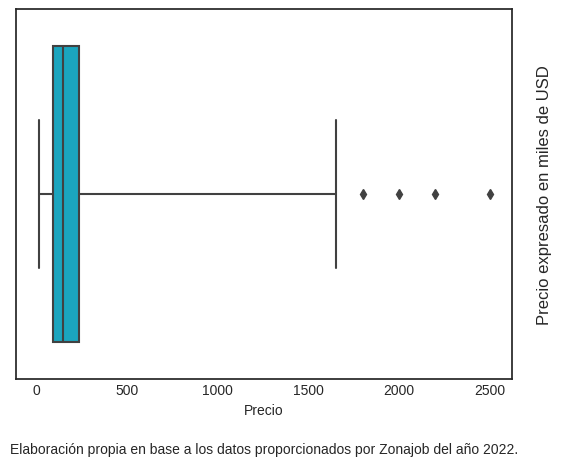

In [ ]:
sns.boxplot(x=data1['Precio'], whis=10, color="#00B8D9");
plt.text(1.05, 0.5, "Precio expresado en miles de USD", transform=plt.gca().transAxes, fontsize=12, rotation=90, va='center')
plt.text(.5, -0.2, "Elaboración propia en base a los datos proporcionados por Zonajob del año 2022.", transform=plt.gca().transAxes, fontsize=10, ha='center')

plt.show()

<ipython-input-116-031e91935d35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Precio'], kde=False,


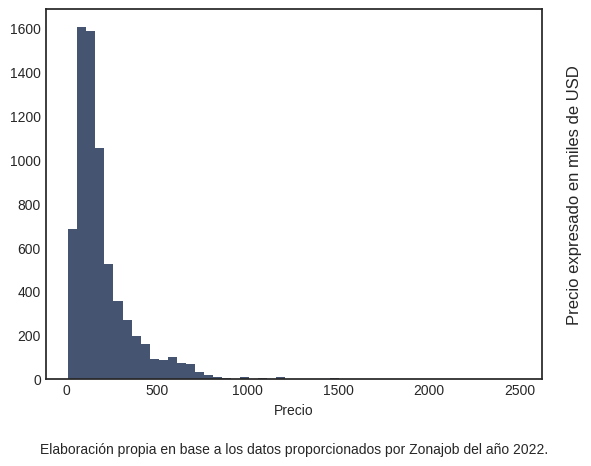

In [ ]:
sns.distplot(data1['Precio'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});

plt.text(1.05, 0.5, "Precio expresado en miles de USD", transform=plt.gca().transAxes, fontsize=12, rotation=90, va='center')
plt.text(.5, -0.2, "Elaboración propia en base a los datos proporcionados por Zonajob del año 2022.", transform=plt.gca().transAxes, fontsize=10, ha='center')

plt.show()

In [ ]:
y_train.describe(include=[np.number])

,Precio
count,4874.000000
mean,195.400876
std,168.945723
min,9.999000
25%,92.000000
50%,141.750000
75%,230.000000
max,2500.000000


Podemos ver que la media es de 195,400.88 USD y la mediana es de 141,750.00 USD. También podemos ver que el primer cuartil es 92.000; esto significa que el 75% de los datos son mayores que este número. Observando ahora el MAE del Random Fores de 50,617.1 USD, podemos decir que un error de alrededor de 50,000 USD es aceptable para unos datos cuya media es 195,400 USD y cuyo 75% es mayor que 92,000 USD

A continuación observaremos cuáles son las variables más importantes para el modelo **Random Forest**.

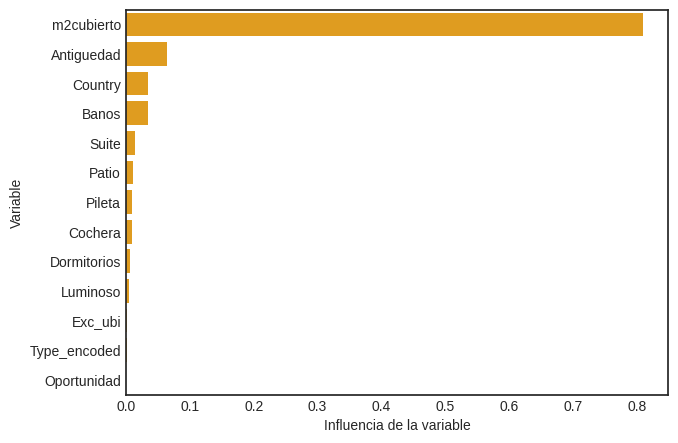

In [ ]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances,
            y=rf_feature_importances.index,
            color="#ffa600");
plt.xlabel('Influencia de la variable');
plt.ylabel('Variable');

Aquí lo que podemos observar es que la variable más influyente, y por mucho margen, del Modelo seleccionado que es el Random Forest, es la variable "m2cubierto".

Este podría ser un punto a mejorar.

### **5. CONCLUSIONES ✅**

En el transcurso de este proyecto de Machine Learning, hemos llevado a cabo un exhaustivo análisis para predecir el precio de publicación de viviendas en la ciudad de Córdoba. Hemos construido varios modelos de predicción, incluyendo Random Forest, Redes Neuronales, Árboles de Decisión, Nearest Neighbors, Regresión Múltiple Ridge y Regresión Múltiple Elastic Net, y los hemos evaluado en términos de rendimiento y capacidad predictiva.


Nuestro enfoque se adhirió a las mejores prácticas de la ciencia de datos, comenzando por la obtención y limpieza de datos, el preprocesamiento y la exploración detallada de los mismos, y culminando en la creación y evaluación de modelos de predicción.


Como resultado de este análisis, hemos identificado que el modelo Random Forest sobresale en términos de precisión en la predicción de precios de viviendas en Córdoba. Este modelo es especialmente útil para personas que desean publicar anuncios de casas o dúplex en la ciudad, ya que ofrece una buena estimación del precio de venta en función de características clave como metros cuadrados cubiertos, antigüedad, número de dormitorios, baños, cocheras, ubicación, presencia de baño en suite, piscina, patio y otros.


Es importante destacar que, al considerar que la media del precio de venta en nuestra base de datos es de 195,400.88 USD y la mediana es de 141,750.00 USD, además de que el primer cuartil es de 92,000 USD (lo que indica que el 75% de los datos supera este valor), el error medio absoluto (MAE) de nuestro modelo seleccionado (Random Forest) de 50,617.1 USD es considerado aceptable. Este nivel de error es razonable dado que está en línea con las características del mercado inmobiliario local.


En resumen, nuestro modelo proporciona una estimación confiable y útil para aquellos que buscan establecer precios de venta competitivos en el mercado inmobiliario de Córdoba.